**Import Necessary Libraries**

In [55]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in the notebook
%matplotlib inline

**Load the Dataset**

In [58]:
from google.colab import files
uploaded = files.upload()

# Print the uploaded filenames
print("Uploaded files:", uploaded.keys())

# Access the uploaded file
import io
# Get the first filename from the uploaded files
filename = next(iter(uploaded))
print("Reading file:", filename)

# Read the Excel file into a DataFrame
df = pd.read_excel(io.BytesIO(uploaded[filename]))

Saving RTA Data 2020 to July 2023.xlsx to RTA Data 2020 to July 2023 (3).xlsx
Uploaded files: dict_keys(['RTA Data 2020 to July 2023 (3).xlsx'])
Reading file: RTA Data 2020 to July 2023 (3).xlsx


**Initial Data Inspection**

In [59]:
def initial_data_inspection(df):
    # Basic Overview
    print("First 5 rows:")
    display(df.head())

    print("\nData summary and types:")
    df.info()

    # Summary statistics for numerical columns
    print("\nSummary statistics for numerical columns:")
    numeric_columns = df.select_dtypes(include=['number'])
    display(numeric_columns.describe())

    # Summary statistics for categorical columns
    print("\nSummary statistics for categorical columns:")
    categorical_columns = df.select_dtypes(include=['object'])
    display(categorical_columns.describe())

    # Missing values (count and percentage)
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    print("\nMissing values and percentage:")
    display(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}).sort_values(by='Percentage', ascending=False))

    # Cardinality of columns
    print("\nUnique values in each column (cardinality):")
    display(df.nunique().sort_values(ascending=False))

    # Correlation matrix for numerical features only
    if not numeric_columns.empty:
        print("\nCorrelation matrix for numerical features:")
        display(numeric_columns.corr())
    else:
        print("\nNo numerical features available for correlation matrix.")

# Call the function for DataFrame
initial_data_inspection(df)

First 5 rows:


,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Data summary and types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    46189 non-null  object        
 1   EcNumber                  38978 non-null  object        
 2   CallTime                  40233 non-null  datetime64[ns]
 3   EmergencyArea             46188 non-null  object        
 4   TotalPatientsInEmergency  46189 non-null  object        
 5   Gender                    46188 non-null  object        
 6   Age                       46188 non-null  float64       
 7   HospitalName              24239 non-null  object        
 8   Reason                    46188 non-null  object        
 9   responsetime              46184 non-null  float64       
 10  EducationTitle            46188 non-null  object        
 11  InjuryType                46187 non-null  object       

,Age,responsetime,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
count,46188.000000,46184.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000
mean,32.447129,6.256106,0.008725,0.967242,0.009202,0.234049,0.001970,0.087297,0.009830,0.002208,0.044948,0.117392,0.009656
std,15.176229,4.901342,0.093467,0.578776,0.100349,0.448054,0.044344,0.289319,0.098657,0.046942,0.220947,0.334686,0.098893
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,118.000000,101.000000,2.000000,10.000000,2.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,4.000000,2.000000



Summary statistics for categorical columns:


,EcYear,EcNumber,EmergencyArea,TotalPatientsInEmergency,Gender,HospitalName,Reason,EducationTitle,InjuryType,Cause,PatientStatus
count,46189,38978,46188,46189,46188,24239,46188,46188,46187,46187,46187
unique,5,34800,37520,13,4,162,23940,9,5,7,3
top,2022,284,Railway Track Underpass Nazar Chowk Near Kach...,1,Male,BBH,same,Matric,Minor,Over Speed,Alive & unstable
freq,12902,3,42,36151,39794,6953,2328,15697,34788,29586,23788



Missing values and percentage:


,Missing Values,Percentage
HospitalName,21950,47.522137
EcNumber,7211,15.611942
CallTime,5956,12.894845
responsetime,5,0.010825
Cause,2,0.004330
BikesInvolved,2,0.004330
VansInvolved,2,0.004330
TrucksInvolved,2,0.004330
TrainsInvovled,2,0.004330
TractorInvovled,2,0.004330



Unique values in each column (cardinality):


,0
CallTime,40170
EmergencyArea,37520
EcNumber,34800
Reason,23940
HospitalName,162
Age,100
responsetime,68
TotalPatientsInEmergency,13
EducationTitle,9
Cause,7



Correlation matrix for numerical features:


,Age,responsetime,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
Age,1.000000,-0.007361,0.037452,-0.080925,0.009166,0.019115,-0.004850,0.011270,-0.013092,0.008125,0.006737,0.029004,0.001057
responsetime,-0.007361,1.000000,-0.014428,-0.081289,0.024658,-0.002765,0.000068,-0.021974,0.039122,0.033208,0.094435,0.057890,0.043855
BicycleInvovled,0.037452,-0.014428,1.000000,-0.070362,-0.003943,-0.018779,0.001076,-0.018560,-0.002257,-0.004392,-0.013749,-0.020286,-0.004431
BikesInvolved,-0.080925,-0.081289,-0.070362,1.000000,-0.108884,-0.325195,-0.020263,-0.272169,-0.080436,-0.076232,-0.199112,-0.281603,-0.060294
BusesInvolved,0.009166,0.024658,-0.003943,-0.108884,1.000000,-0.030083,-0.004074,-0.012008,-0.004762,0.004879,0.047750,-0.002509,0.006318
CarsInvolved,0.019115,-0.002765,-0.018779,-0.325195,-0.030083,1.000000,-0.013402,-0.076445,-0.030495,-0.022517,-0.027314,-0.108146,-0.030973
CartInvovled,-0.004850,0.000068,0.001076,-0.020263,-0.004074,-0.013402,1.000000,-0.004968,-0.004427,-0.002090,-0.006829,-0.005373,-0.004339
RickshawsInvolved,0.011270,-0.021974,-0.018560,-0.272169,-0.012008,-0.076445,-0.004968,1.000000,-0.018685,-0.014195,-0.031577,-0.050831,-0.015085
TractorInvovled,-0.013092,0.039122,-0.002257,-0.080436,-0.004762,-0.030495,-0.004427,-0.018685,1.000000,-0.004687,-0.011330,-0.002817,-0.005291
TrainsInvovled,0.008125,0.033208,-0.004392,-0.076232,0.004879,-0.022517,-0.002090,-0.014195,-0.004687,1.000000,-0.009571,-0.015124,-0.004594


**Initial Data Preprocessing**

In [60]:
def preprocess_data(df):
    # Drop rows where essential fields are missing
    df_cleaned = df.dropna(subset=['CallTime', 'responsetime', 'EcNumber']).copy()  # Create a copy explicitly

    # Fill missing HospitalName with 'Unknown' since it's categorical
    df_cleaned['HospitalName'].fillna('Unknown', inplace=True)

    # Fill the minimal missing values in numeric columns with 0 (for vehicle involvement)
    vehicle_columns = ['BikesInvolved', 'BusesInvolved', 'CarsInvolved', 'CartInvovled',
                       'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
                       'TrucksInvolved', 'VansInvolved', 'OthersInvolved']

    # Fill missing vehicle involvement columns with 0
    df_cleaned[vehicle_columns] = df_cleaned[vehicle_columns].fillna(0)

    # Fill missing 'Age' with the median
    df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)

    # Convert 'CallTime' to datetime, handling errors
    df_cleaned['CallTime'] = pd.to_datetime(df_cleaned['CallTime'], errors='coerce')

    # Extracting Year, Month, Day, Hour from CallTime
    df_cleaned['Year'] = df_cleaned['CallTime'].dt.year
    df_cleaned['Month'] = df_cleaned['CallTime'].dt.month
    df_cleaned['Day'] = df_cleaned['CallTime'].dt.day
    df_cleaned['Hour'] = df_cleaned['CallTime'].dt.hour

    return df_cleaned

# Call the function to clean the data
df_cleaned = preprocess_data(df)

**Exploratory Data Analysis (EDA)**

**1. Univariate Analysis**

**1.1 Numerical Variables**

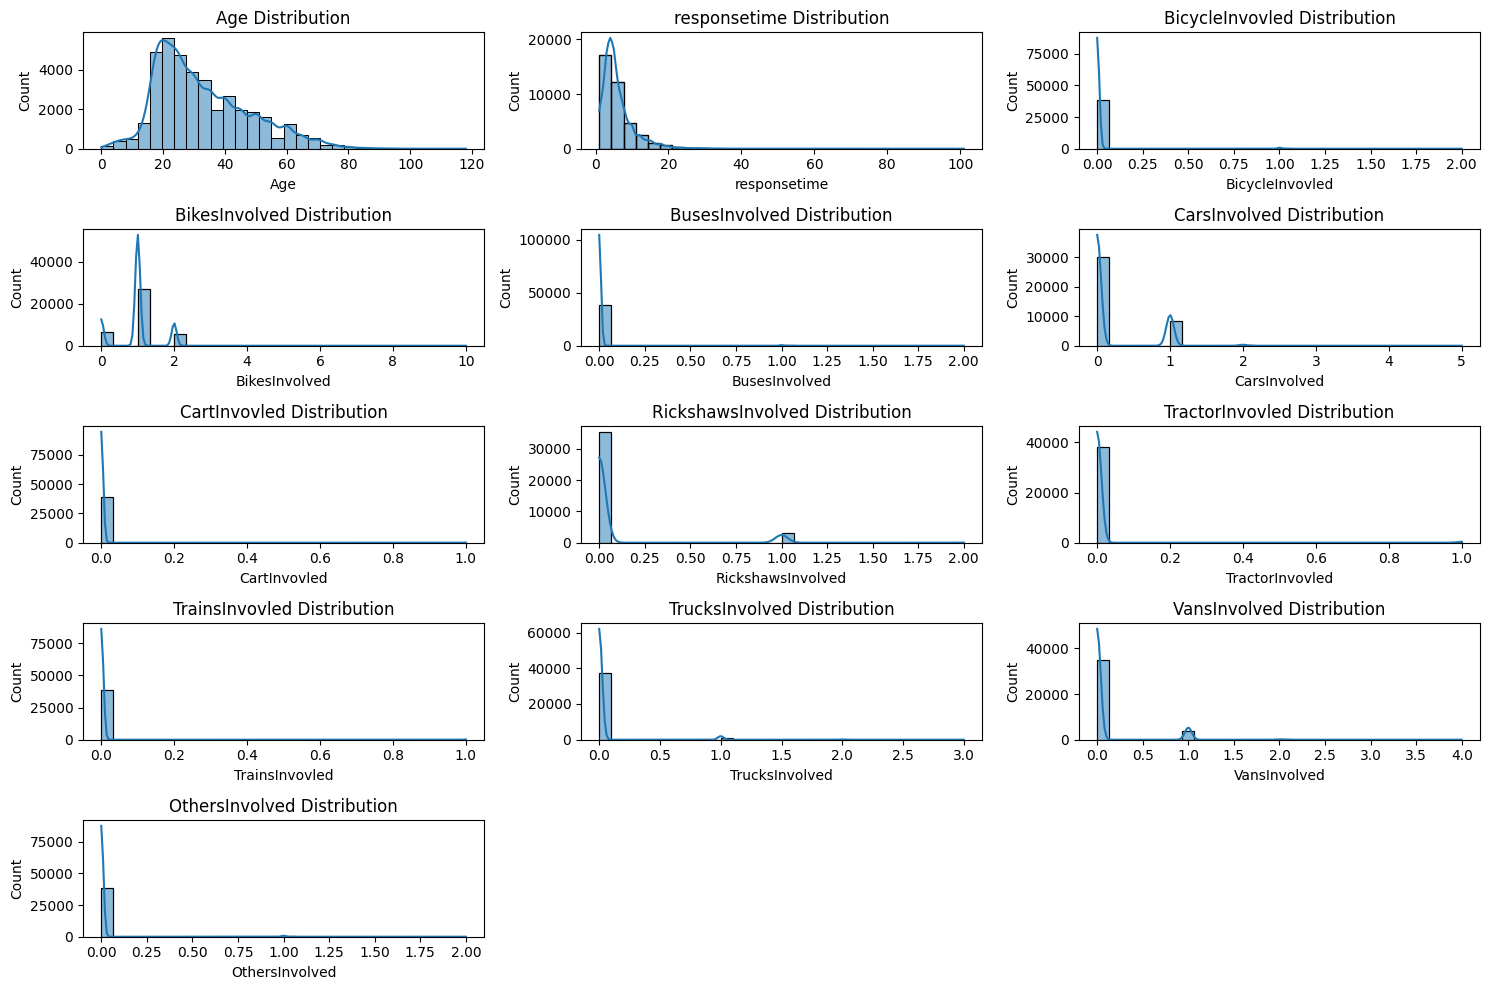

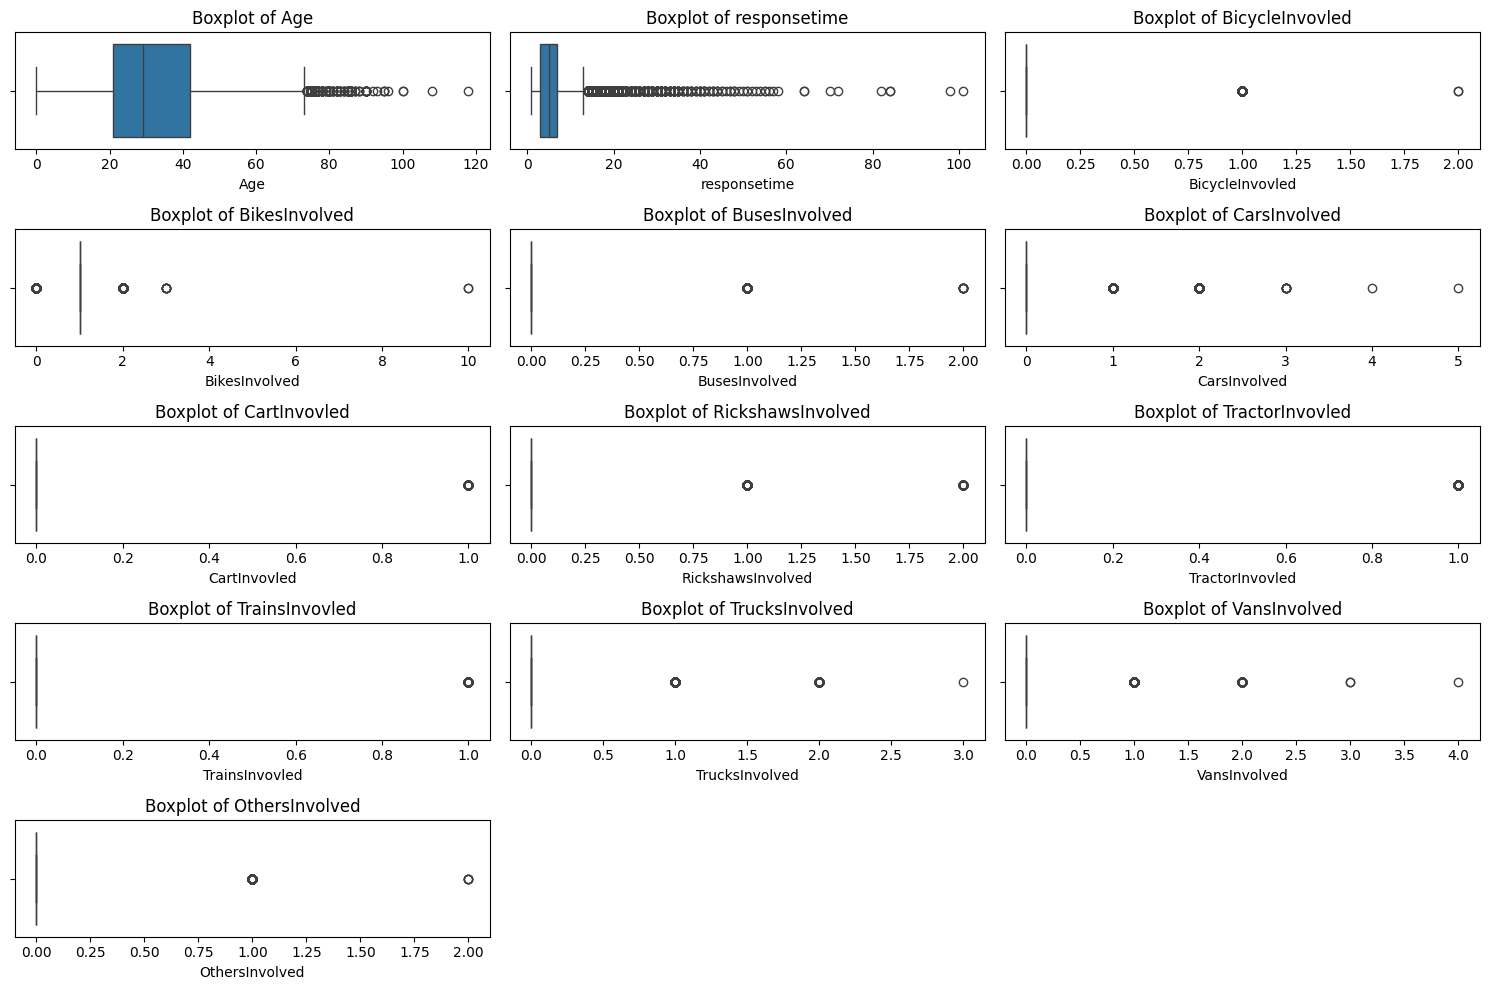

In [61]:
# Combined histogram and KDE for all numerical variables
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.tight_layout()
plt.show()

# Boxplots to inspect spread and outliers for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

**1.2 Categorical Variables**

Categorical columns detected: ['EcNumber', 'EmergencyArea', 'TotalPatientsInEmergency', 'Gender', 'HospitalName', 'Reason', 'EducationTitle', 'InjuryType', 'Cause', 'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved']

Plotting column: EcNumber
Unique values in EcNumber: [371, 73, 56, 57, 63, 64, 5116, 5118, 5125, 66, 5129, 70, 5157, 71, 76, 102, 81, 82, 83, 84]


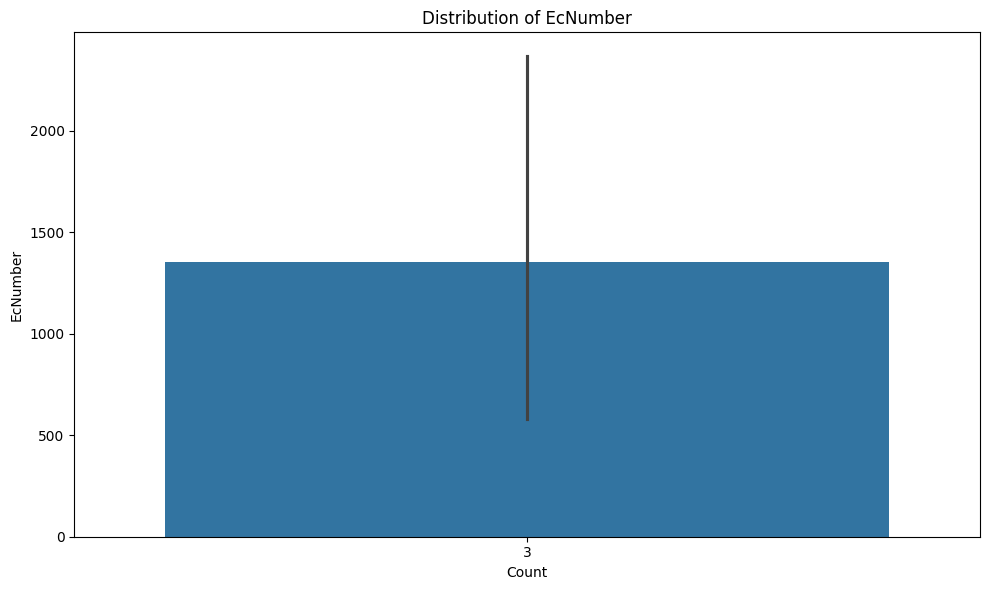


Plotting column: EmergencyArea
Unique values in EmergencyArea: [' Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.', ' Cod Chowk Adyala Road Rawalpindi', ' 502 Chowk, Adyala Road, Rwp', 'Near Pc Hotel Signal Mall Road Rwp', ' Bohar Masjid Chore Peshawer Road Rwp', ' 22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi', ' Near Pc Hotel Signal Mall Road Rwp', 'Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.', ' Near Romi Park, Saddar, Rawalpindi', ' Gulshanabad Stop, Adyala Road, Rwp', ' Mandra Toll Plaza G.t Road', 'Khawaja Corporation Chowk, Adyala Road, Rwp.', 'Cod Chowk Adyala Road Rawalpindi', ' Kachari Chowk Old Airport Road Rwp', 'Ammar Shaheed Chowk, Airport Road, Rawalpindi.', 'Gpo Chowk, Mall Road Saddar Rawalpindi', ' Khawaja Corporation Chowk, Adyala Road, Rwp.', ' Adiala Road, Kalyal Stop, Rwp', ' Mh Hospital Signal Peshawar Road Rwp', ' Kacha Stop I.j.p Road']


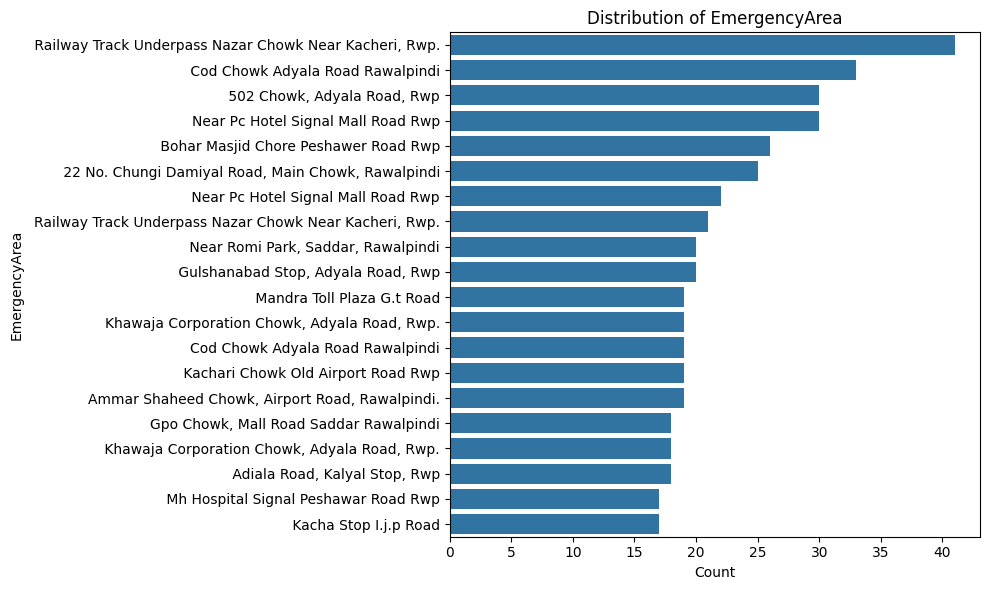


Plotting column: TotalPatientsInEmergency
Unique values in TotalPatientsInEmergency: [1, 2, 3, 4, 5, 6, 7, 8, 11, 9, 10, 15]


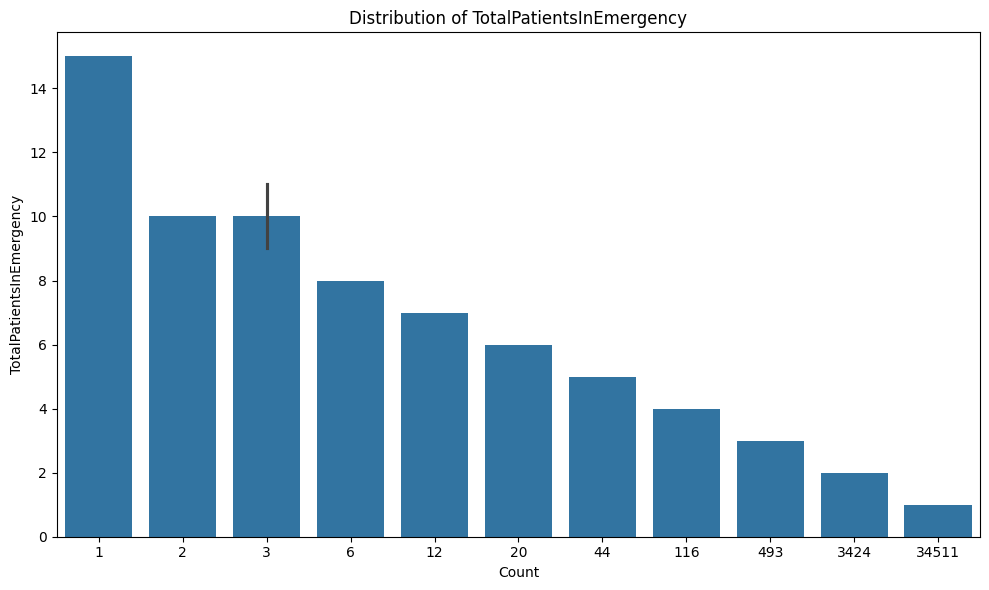


Plotting column: Gender
Unique values in Gender: ['Male', 'Female', 'Other']


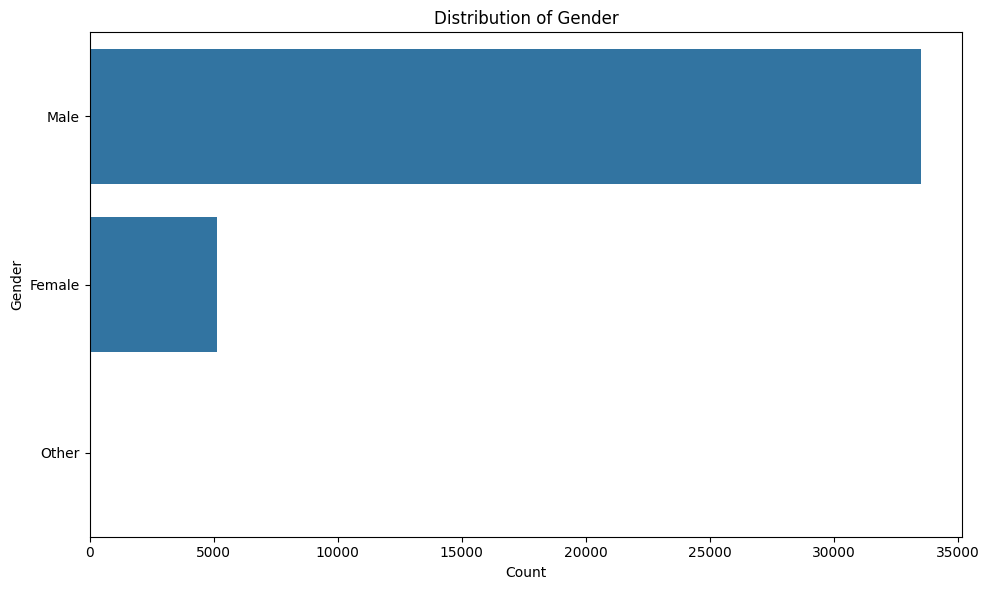


Plotting column: HospitalName
Unique values in HospitalName: ['Unknown', 'BBH', 'DHQ', 'PIMS', 'RHC,Mandra,Rawalpindi', 'HFH', 'Wah General Hospital ', 'CMH', 'THQ Kallar Saydan', 'THQ,Gujar Khan, Rawalpindi', 'Kalar Sayedan, THQ', 'Fouji Foundation Hospital ', 'THQ, Taxila', 'MH', 'Taxila, THQ Hospital', 'Cantonment General Hospital', 'THQ Kahuta ', 'RHC, Baga Sheikhan, Rwp', 'POF Hospital, Wah Cantt', 'THQ, Kotli Satian']


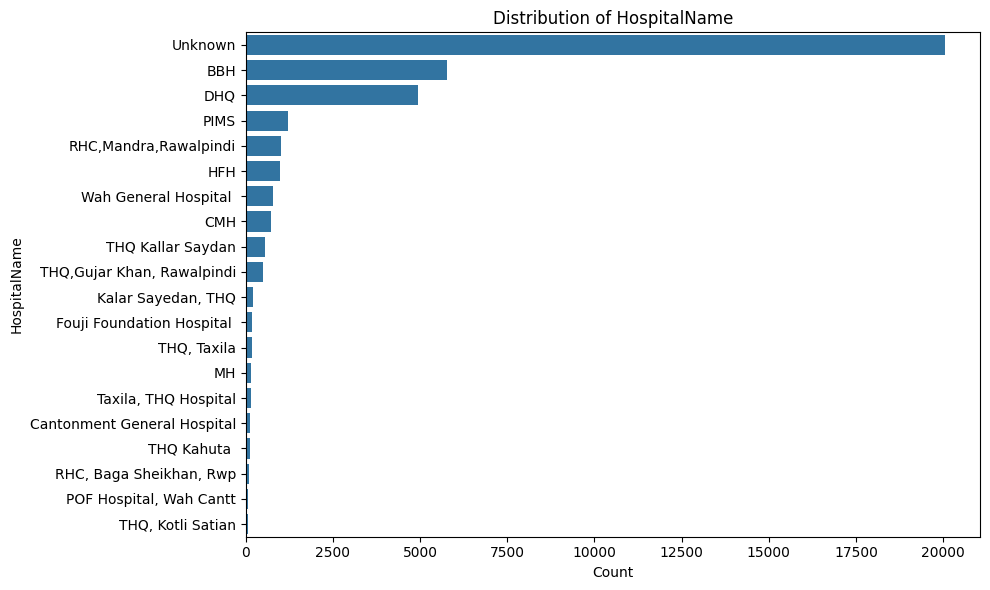


Plotting column: Reason
Unique values in Reason: ['Bike Slipped ', 'same', 'Bike Slip', 'Bike slipped', 'Same ', 'Same', 'bike slipped', 'Bike hit the Pedestrian and Runaway ', 'Bike hit Pedestrian and runaway', 'Car hit the Bike and Runaway ', 'Bike hit Bike and runaway', '.', 'Car hit Bike and runaway', 'Bike hit the Pedestrian ', 'Bike hit the Bike and Runaway ', 'two bikes collieds', 'Car hit the Bike ', 'Bike hit Pedestrian', 'car hit bike and escaped', 'Bike hit bike and escaped']


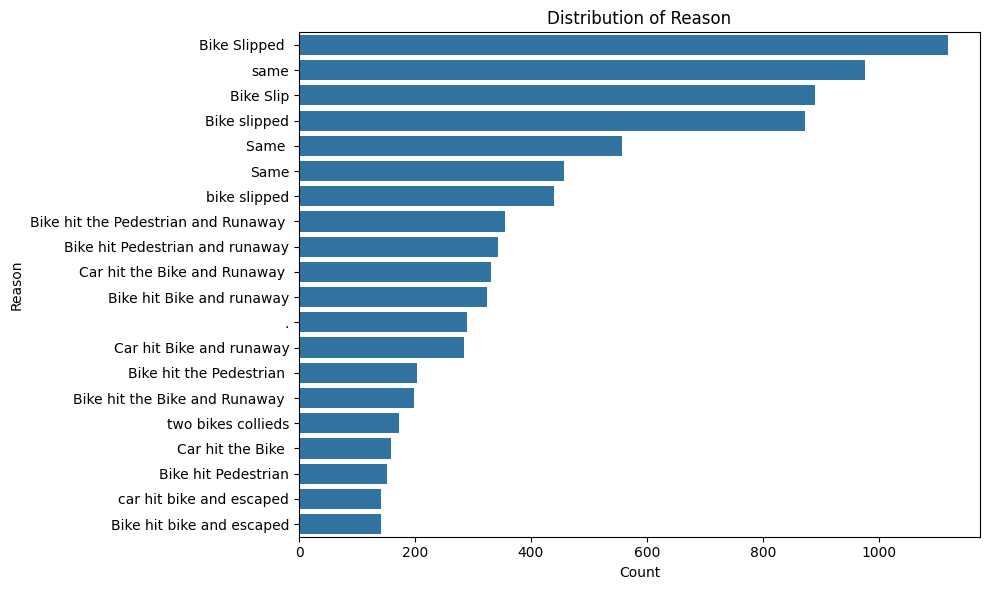


Plotting column: EducationTitle
Unique values in EducationTitle: ['Matric', 'Primary', 'Illetrate', 'Intermediate', 'Graduation', 'Masters', 'Middle', 'PHD']


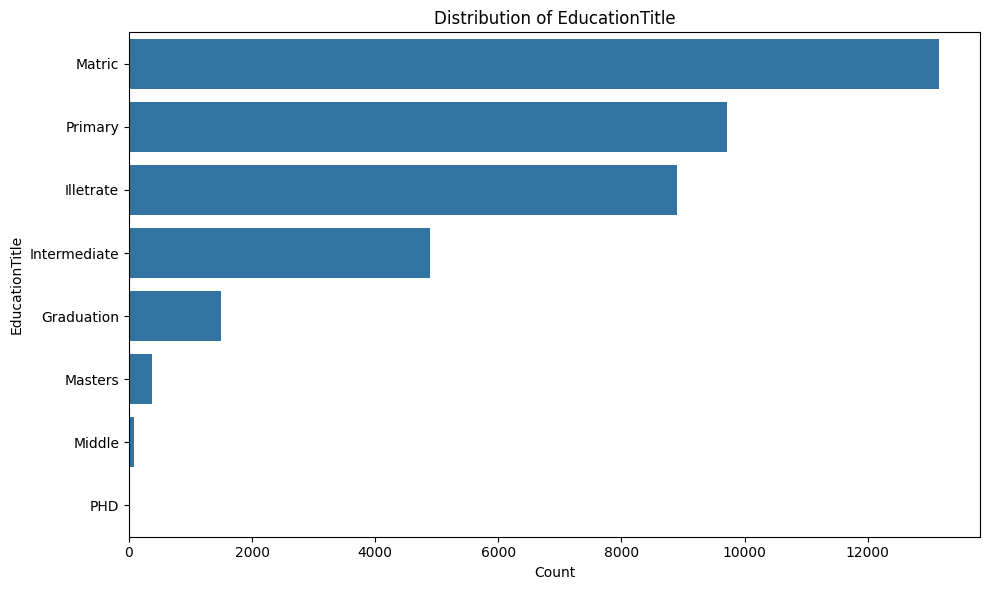


Plotting column: InjuryType
Unique values in InjuryType: ['Minor', 'Single Fracture', 'Head Injury', 'Multiple Fractures', 'Spinal Injury']


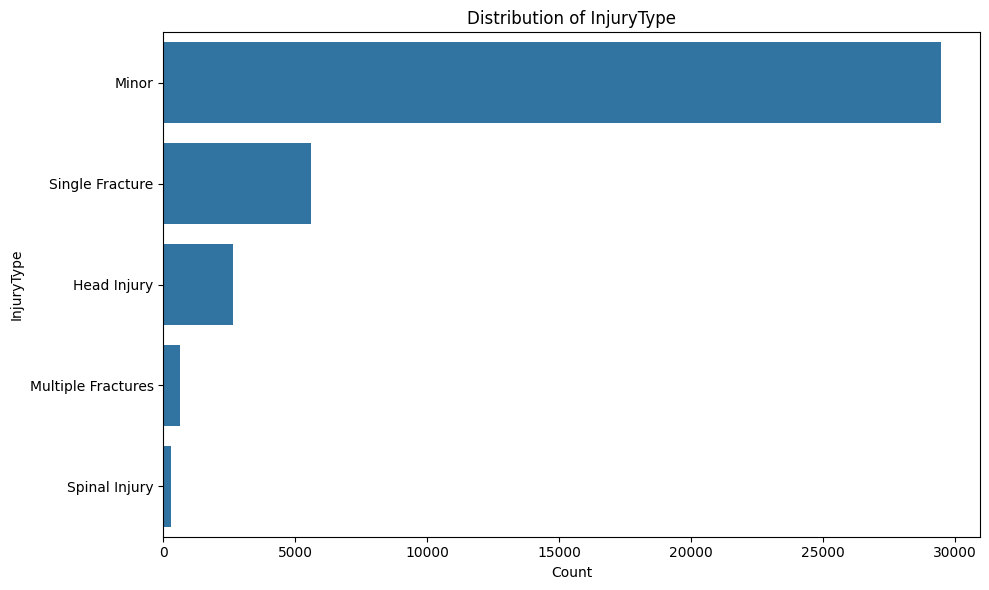


Plotting column: Cause
Unique values in Cause: ['Over Speed', 'Carelessness', 'U Turn', 'Wrong Turn', 'Tyre Burst', 'Others', 'One Wheeling']


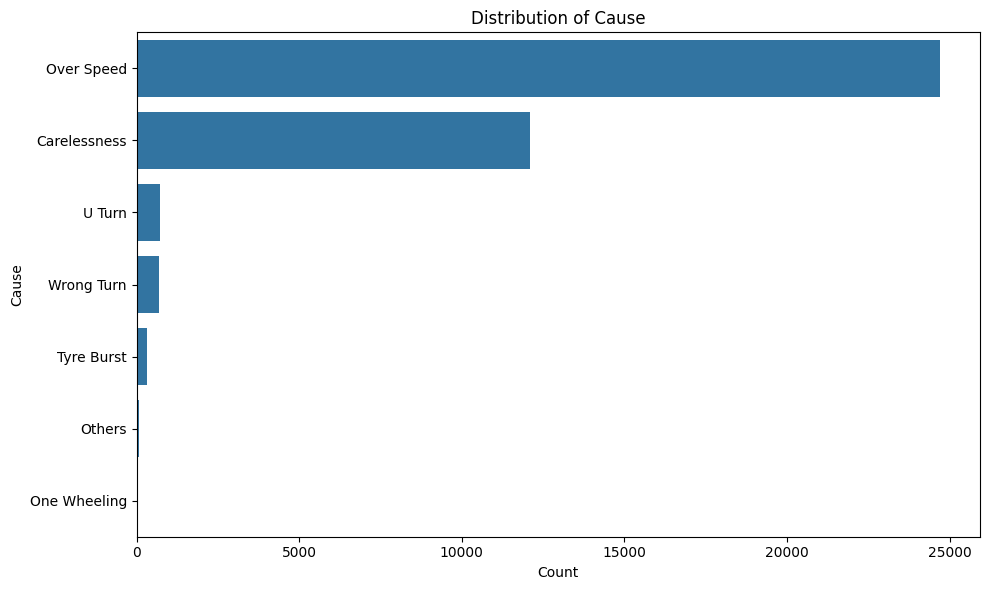


Plotting column: PatientStatus
Unique values in PatientStatus: ['Alive & stable', 'Alive & unstable', 'Dead']


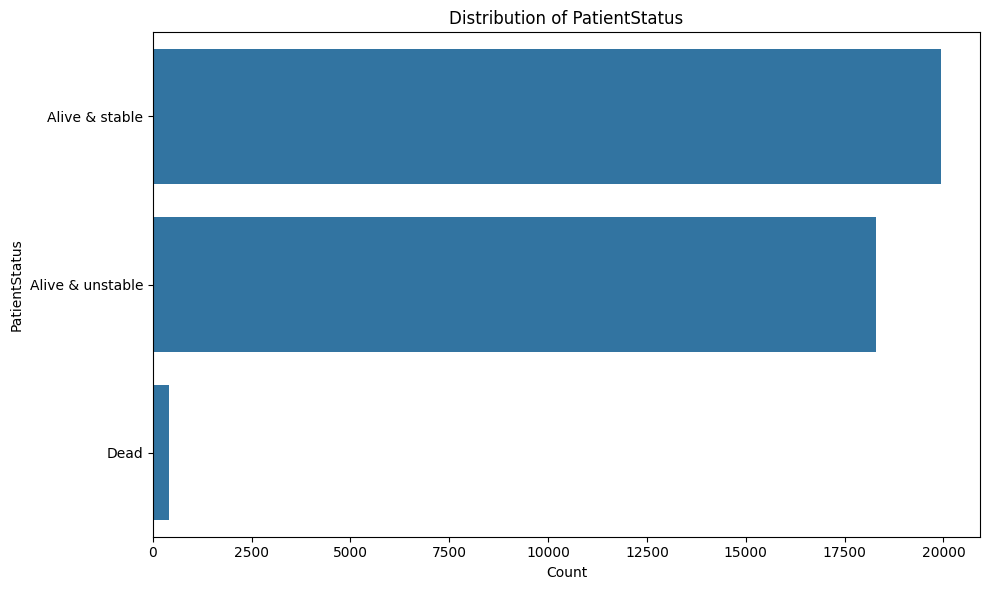


Plotting column: BicycleInvovled
Unique values in BicycleInvovled: [0.0, 1.0, 2.0]


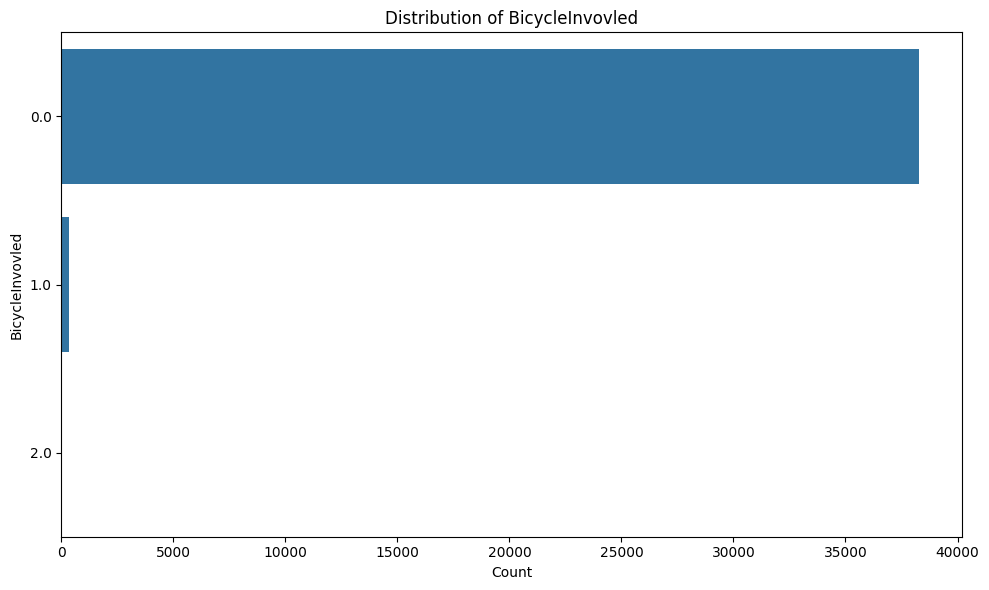


Plotting column: BikesInvolved
Unique values in BikesInvolved: [1.0, 0.0, 2.0, 3.0, 10.0]


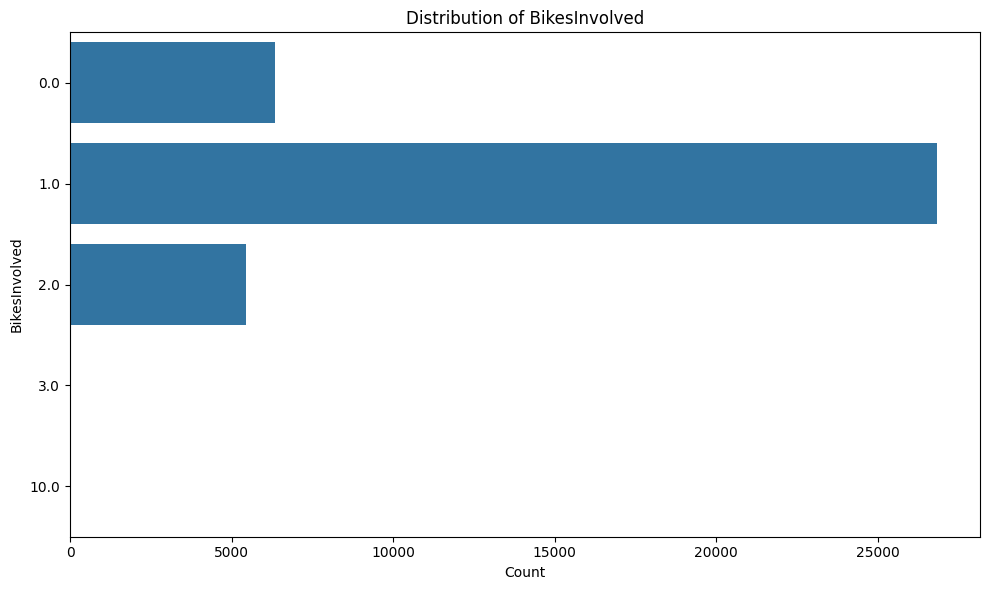


Plotting column: BusesInvolved
Unique values in BusesInvolved: [0.0, 1.0, 2.0]


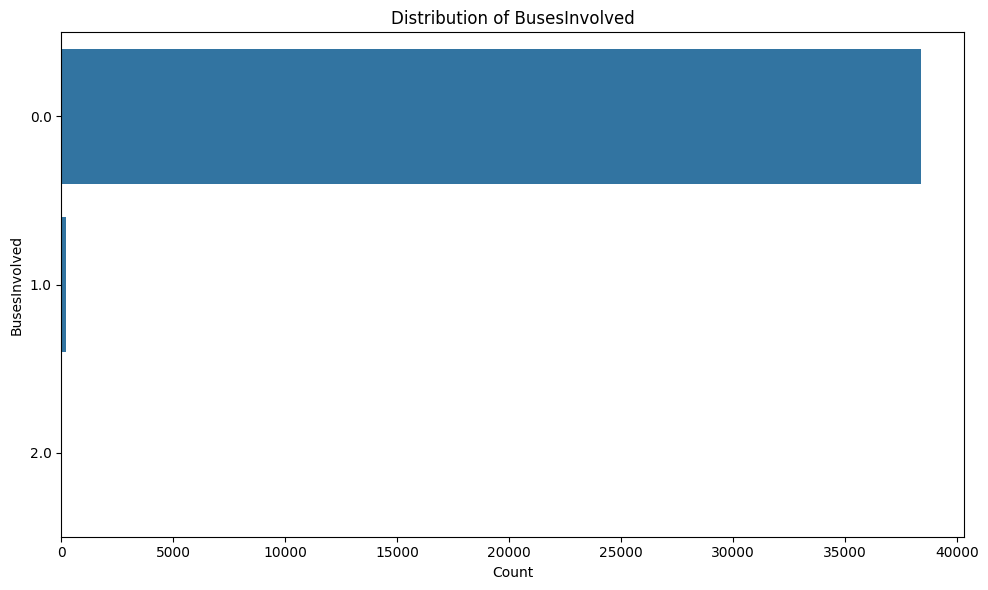


Plotting column: CarsInvolved
Unique values in CarsInvolved: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


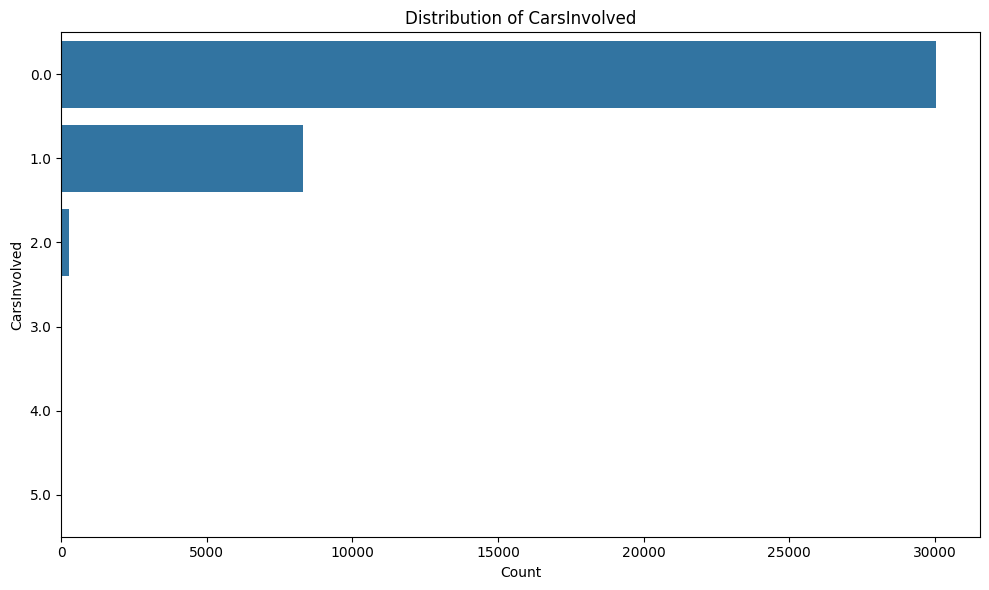


Plotting column: CartInvovled
Unique values in CartInvovled: [0.0, 1.0]


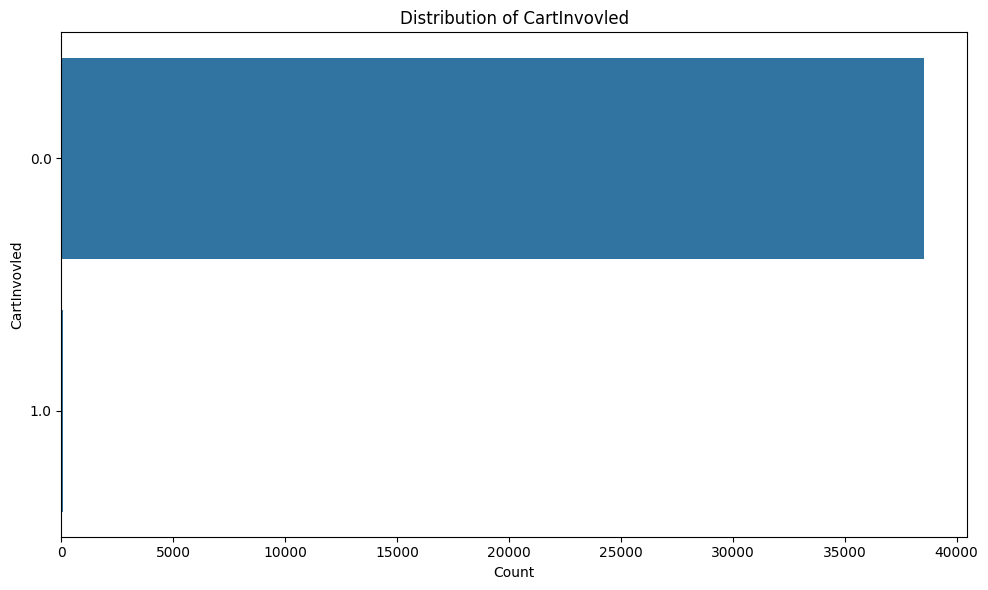


Plotting column: RickshawsInvolved
Unique values in RickshawsInvolved: [0.0, 1.0, 2.0]


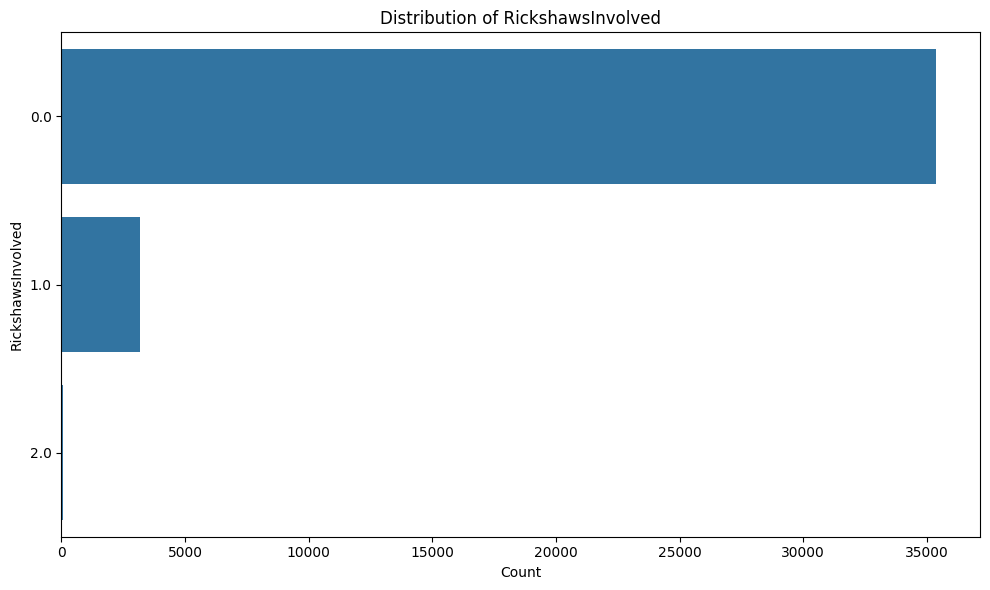


Plotting column: TractorInvovled
Unique values in TractorInvovled: [0.0, 1.0]


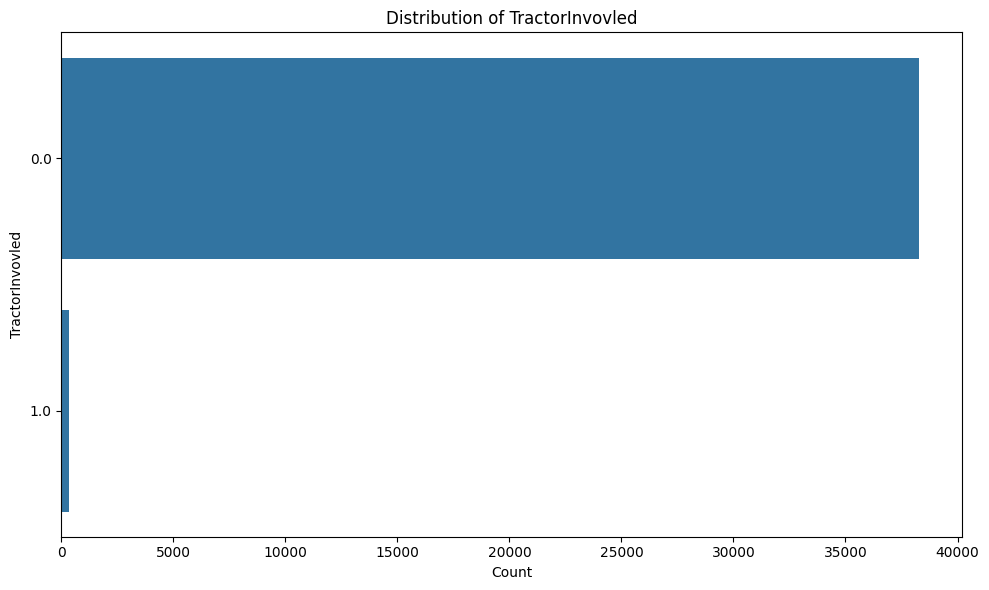


Plotting column: TrainsInvovled
Unique values in TrainsInvovled: [0.0, 1.0]


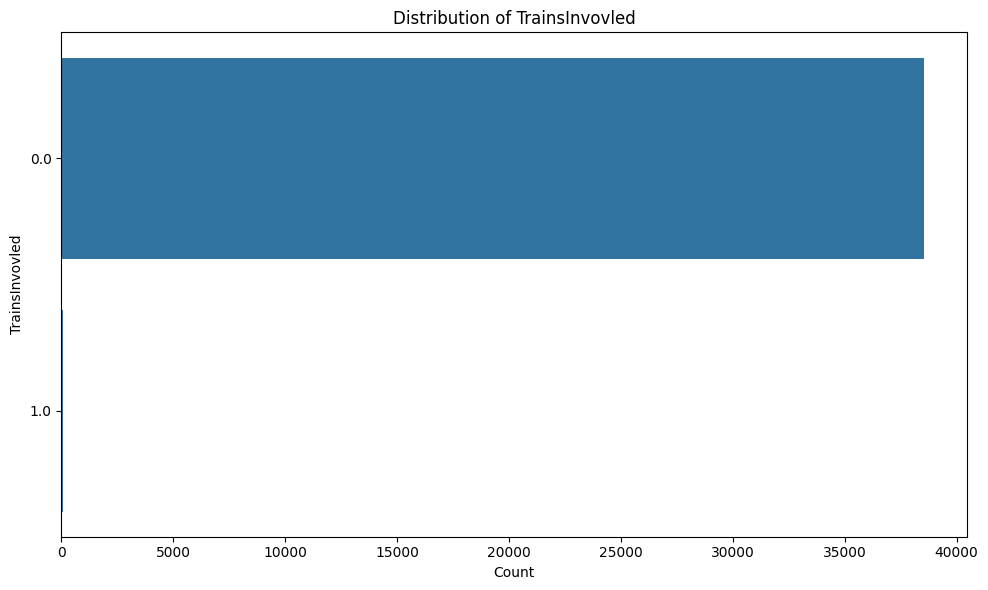


Plotting column: TrucksInvolved
Unique values in TrucksInvolved: [0.0, 1.0, 2.0, 3.0]


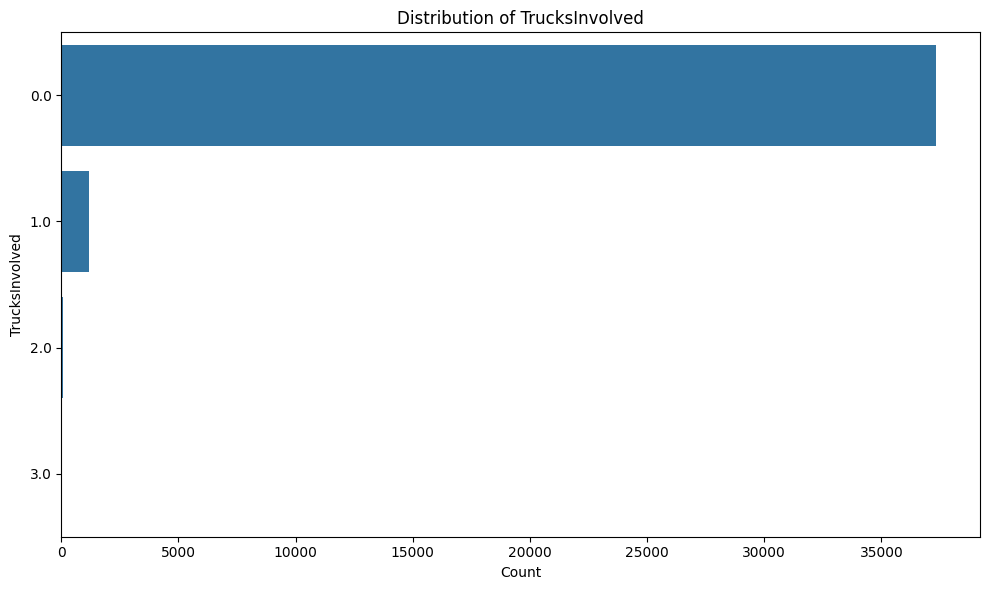


Plotting column: VansInvolved
Unique values in VansInvolved: [0.0, 1.0, 2.0, 3.0, 4.0]


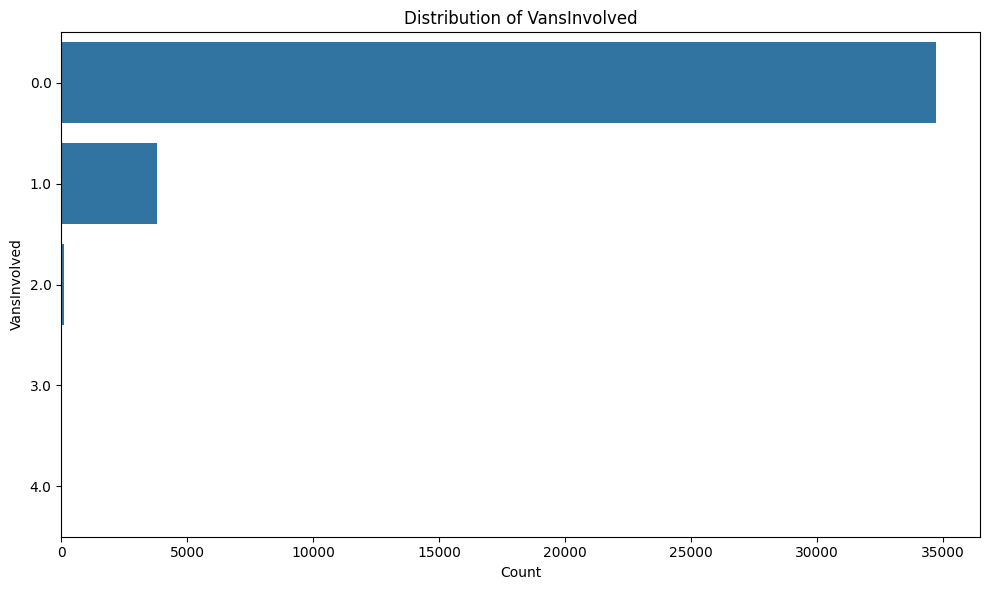


Plotting column: OthersInvolved
Unique values in OthersInvolved: [0.0, 1.0, 2.0]


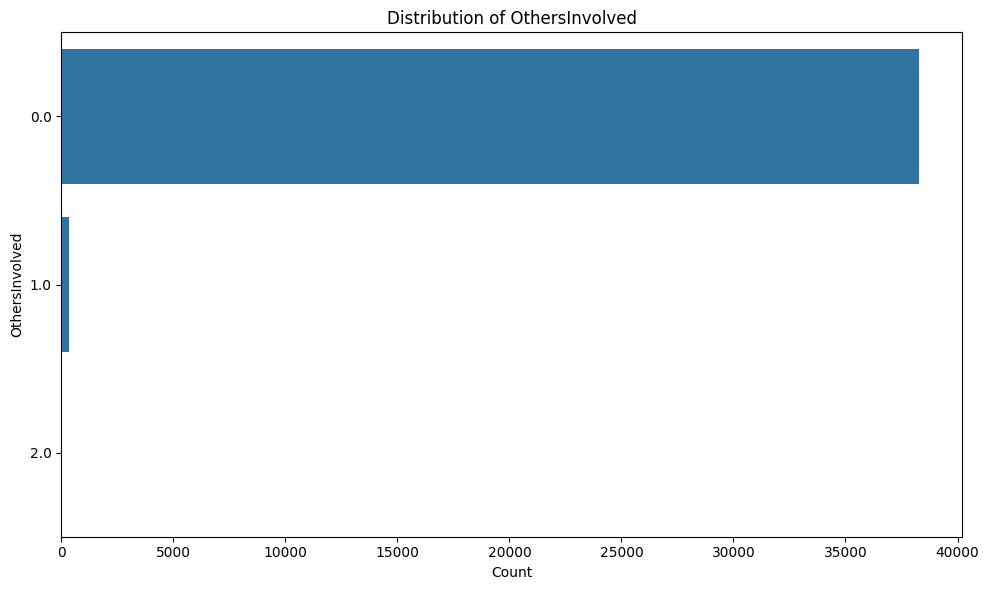

In [66]:
# Function to clean categorical columns
def clean_categorical_columns(df):
    # Convert misclassified numeric columns with few unique values to categorical
    for col in df.columns:
        if col != 'EcYear':  # Exclude 'EcYear' from conversion
            if df[col].dtype in ['int64', 'float64'] and df[col].nunique() < 20:
                df[col] = df[col].astype('category')
    return df

# Function to plot categorical variables
def plot_categorical_columns(df, max_categories=20):
    # Clean categorical columns before plotting
    df_cleaned = clean_categorical_columns(df)

    # Select categorical columns
    categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

    print(f"Categorical columns detected: {categorical_columns.tolist()}")  # Debugging print statement

    for col in categorical_columns:
        # Get the value counts, limit to top 'max_categories' if necessary
        value_counts = df_cleaned[col].value_counts().nlargest(max_categories)

        # Print debugging information
        print(f"\nPlotting column: {col}")
        print(f"Unique values in {col}: {value_counts.index.tolist()}")

        # Plot the bar chart
        plt.figure(figsize=(10, 6))
        sns.barplot(y=value_counts.index, x=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

# Identify and remove rows where 'EcYear' is 'Hospital' & Use .copy() to avoid SettingWithCopyWarning
df_cleaned = df_cleaned[df_cleaned['EcYear'] != 'Hospital'].copy()

# Convert 'EcYear' to numeric using .loc to avoid the warning
df_cleaned.loc[:, 'EcYear'] = pd.to_numeric(df_cleaned['EcYear'], errors='coerce')

# Drop rows with NaN in 'EcYear' using .loc or ensure df_cleaned is a copy
df_cleaned.dropna(subset=['EcYear'], inplace=True)

# Call the function for the cleaned dataframe
plot_categorical_columns(df_cleaned)

**2. Bivariate Analysis**

**2.1 Numerical vs Numerical**

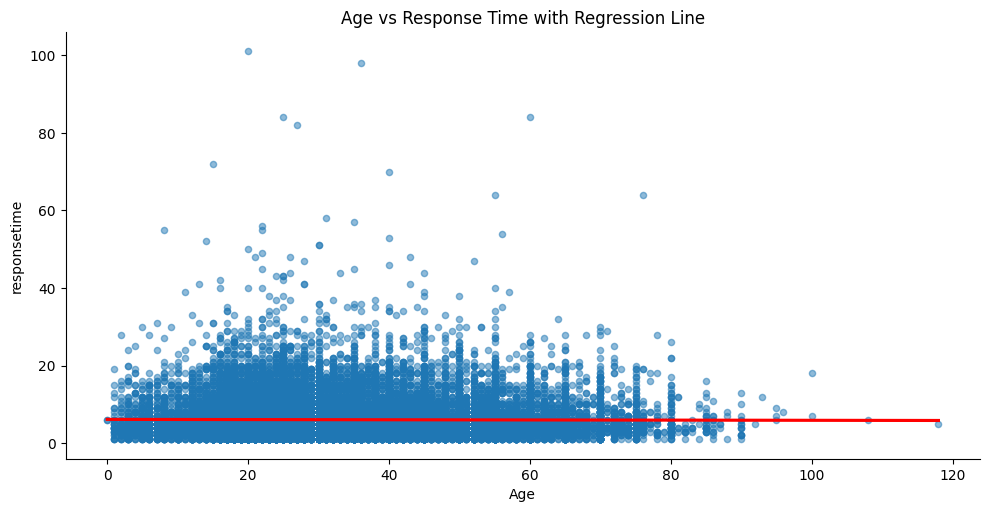

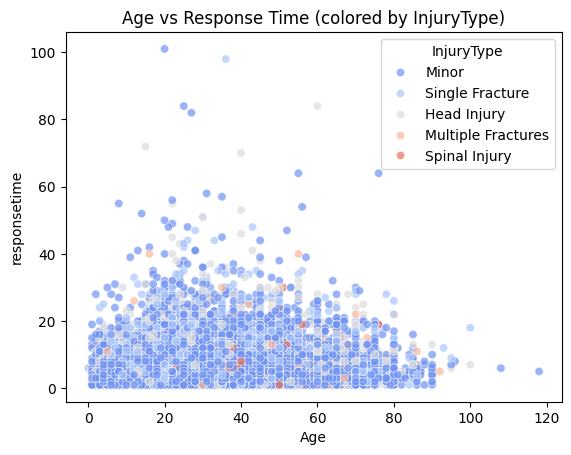

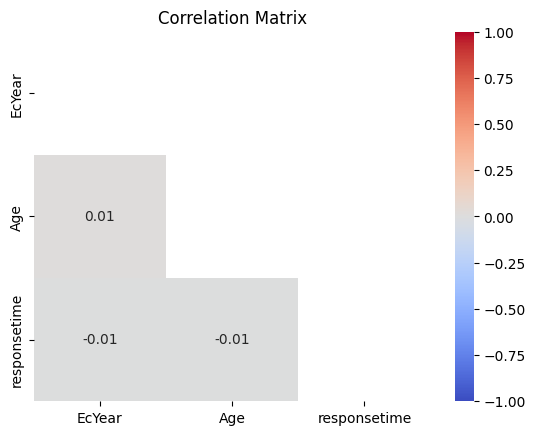

In [68]:
# Scatter plot for Age vs Response Time with regression line
sns.lmplot(x='Age', y='responsetime', data=df_cleaned, aspect=2, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Age vs Response Time with Regression Line')
plt.show()

# Scatter plot for Age vs Response Time colored by InjuryType
sns.scatterplot(x='Age', y='responsetime', hue='InjuryType', data=df_cleaned, palette='coolwarm', alpha=0.7)
plt.title('Age vs Response Time (colored by InjuryType)')
plt.show()

# Correlation matrix heatmap
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).dropna()
mask = np.triu(np.ones_like(numerical_cols.corr(), dtype=bool))
sns.heatmap(numerical_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**2.2 Numerical vs Categorical**

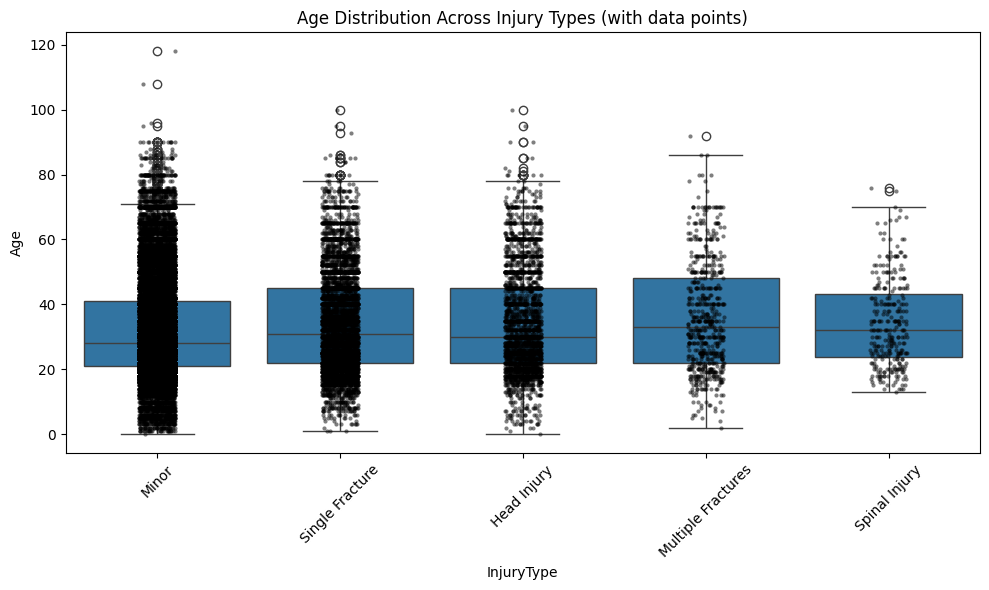

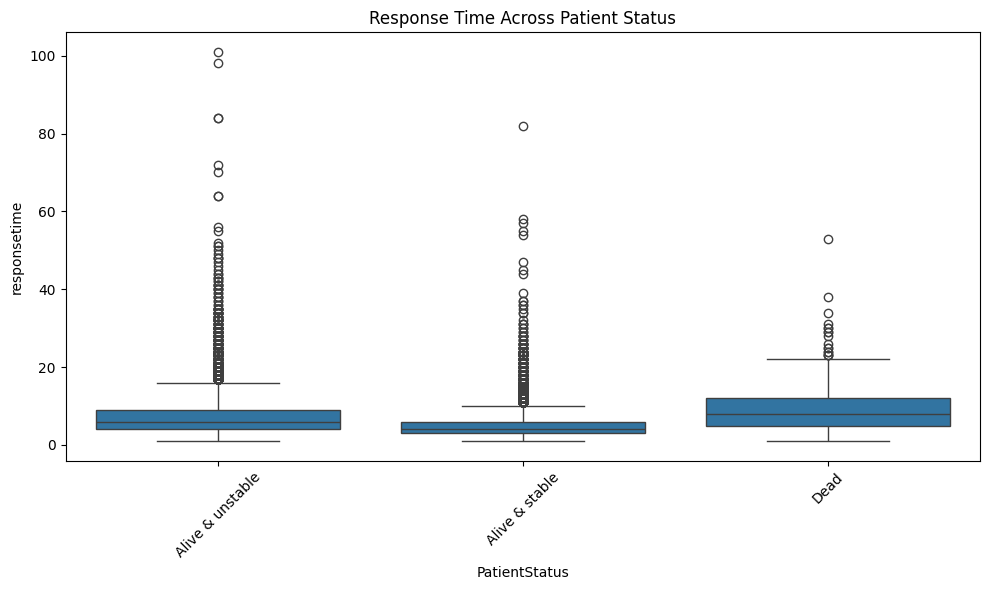

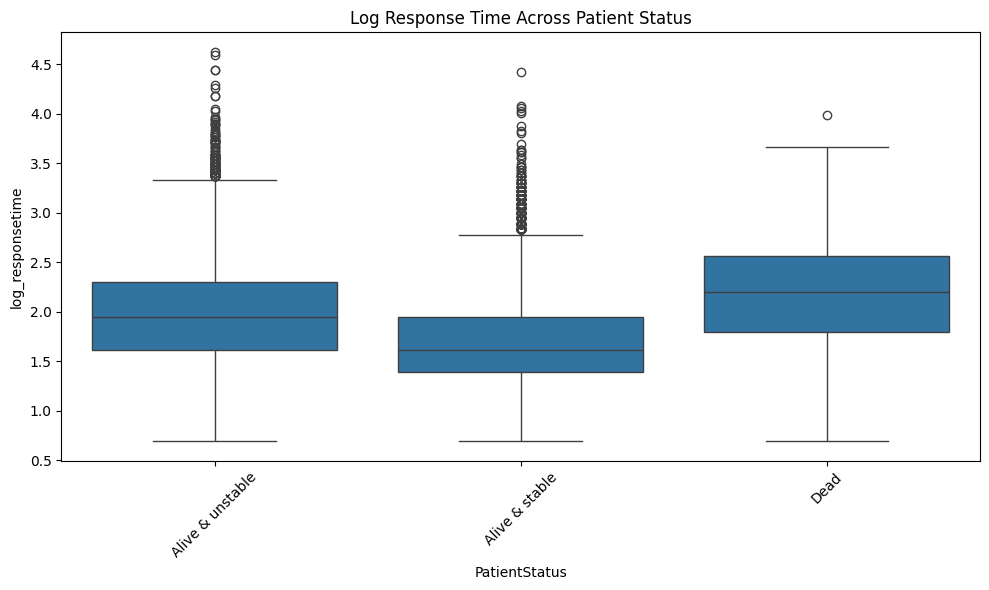

In [69]:
# Boxplot for Age across Injury Types (no palette as there's no hue)
plt.figure(figsize=(10, 6))
sns.boxplot(x='InjuryType', y='Age', data=df_cleaned, showfliers=True)
sns.stripplot(x='InjuryType', y='Age', data=df_cleaned, color='black', size=3, alpha=0.5)  # Overlay individual points
plt.xticks(rotation=45)
plt.title('Age Distribution Across Injury Types (with data points)')
plt.tight_layout()
plt.show()

# Boxplot for Response Time across Patient Status (no palette as there's no hue)
plt.figure(figsize=(10, 6))
sns.boxplot(x='PatientStatus', y='responsetime', data=df_cleaned, showfliers=True)
plt.xticks(rotation=45)
plt.title('Response Time Across Patient Status')
plt.tight_layout()
plt.show()

# Log transformation of Response Time to handle skewness
df_cleaned['log_responsetime'] = np.log1p(df_cleaned['responsetime'])  # Log transformation to reduce skewness

# Boxplot for log-transformed Response Time across Patient Status (no palette as there's no hue)
plt.figure(figsize=(10, 6))
sns.boxplot(x='PatientStatus', y='log_responsetime', data=df_cleaned, showfliers=True)
plt.xticks(rotation=45)
plt.title('Log Response Time Across Patient Status')
plt.tight_layout()
plt.show()

**2.3 Categorical vs Categorical**

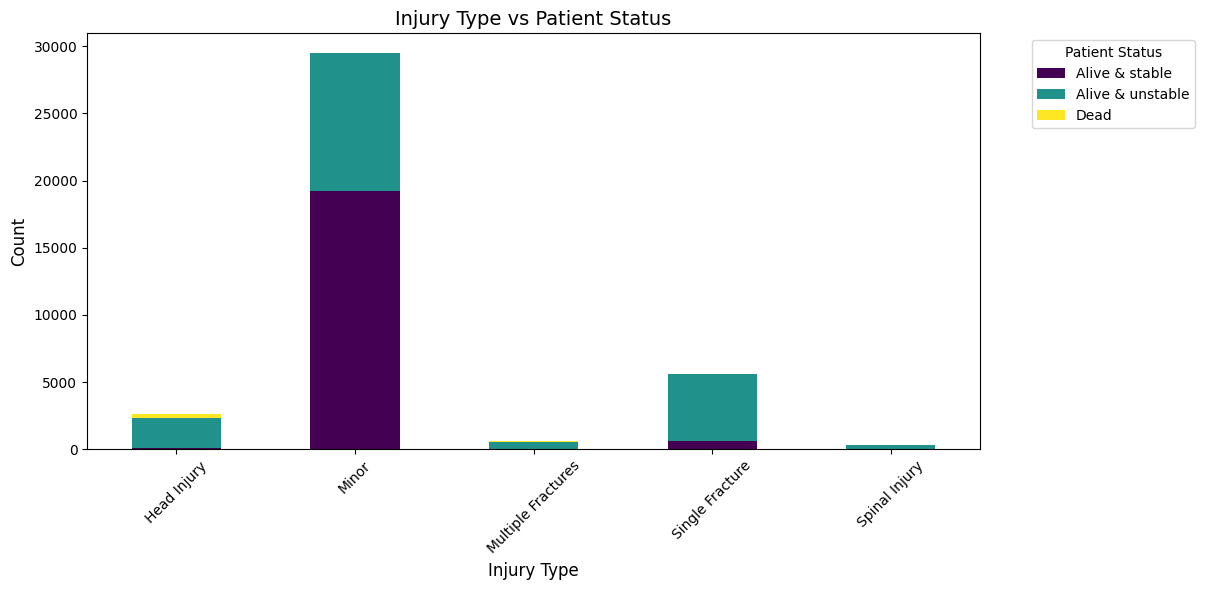

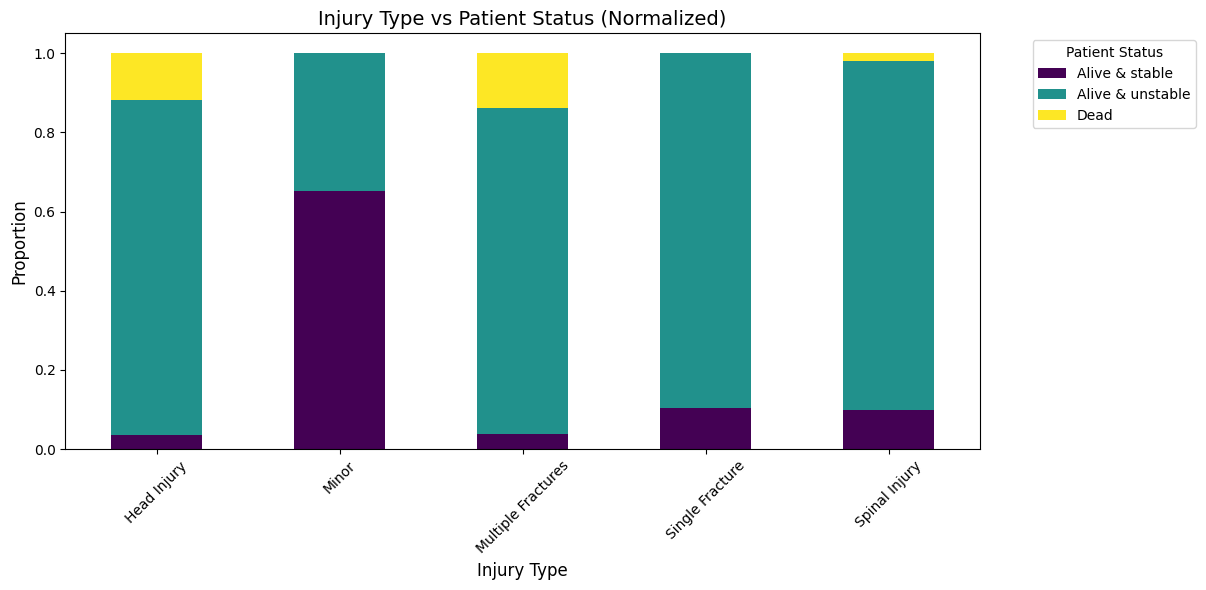

In [70]:
# Crosstab between Injury Type and Patient Status (Stacked Bar Plot)
crosstab_data = pd.crosstab(df_cleaned['InjuryType'], df_cleaned['PatientStatus'])

# Plot the stacked bar chart
crosstab_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Customizing the plot
plt.title('Injury Type vs Patient Status', fontsize=14)
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Patient Status', bbox_to_anchor=(1.05, 1), loc='upper left')  # Better legend positioning
plt.show()

# Normalized Crosstab (Percentage Plot)
crosstab_data_normalized = pd.crosstab(df_cleaned['InjuryType'], df_cleaned['PatientStatus'], normalize='index')
crosstab_data_normalized.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Customizing the plot
plt.title('Injury Type vs Patient Status (Normalized)', fontsize=14)
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Patient Status', bbox_to_anchor=(1.05, 1), loc='upper left')  # Better legend positioning
plt.show()

**3. Multivariate Analysis**

**3.1 Pair Plots for Numerical Variables**

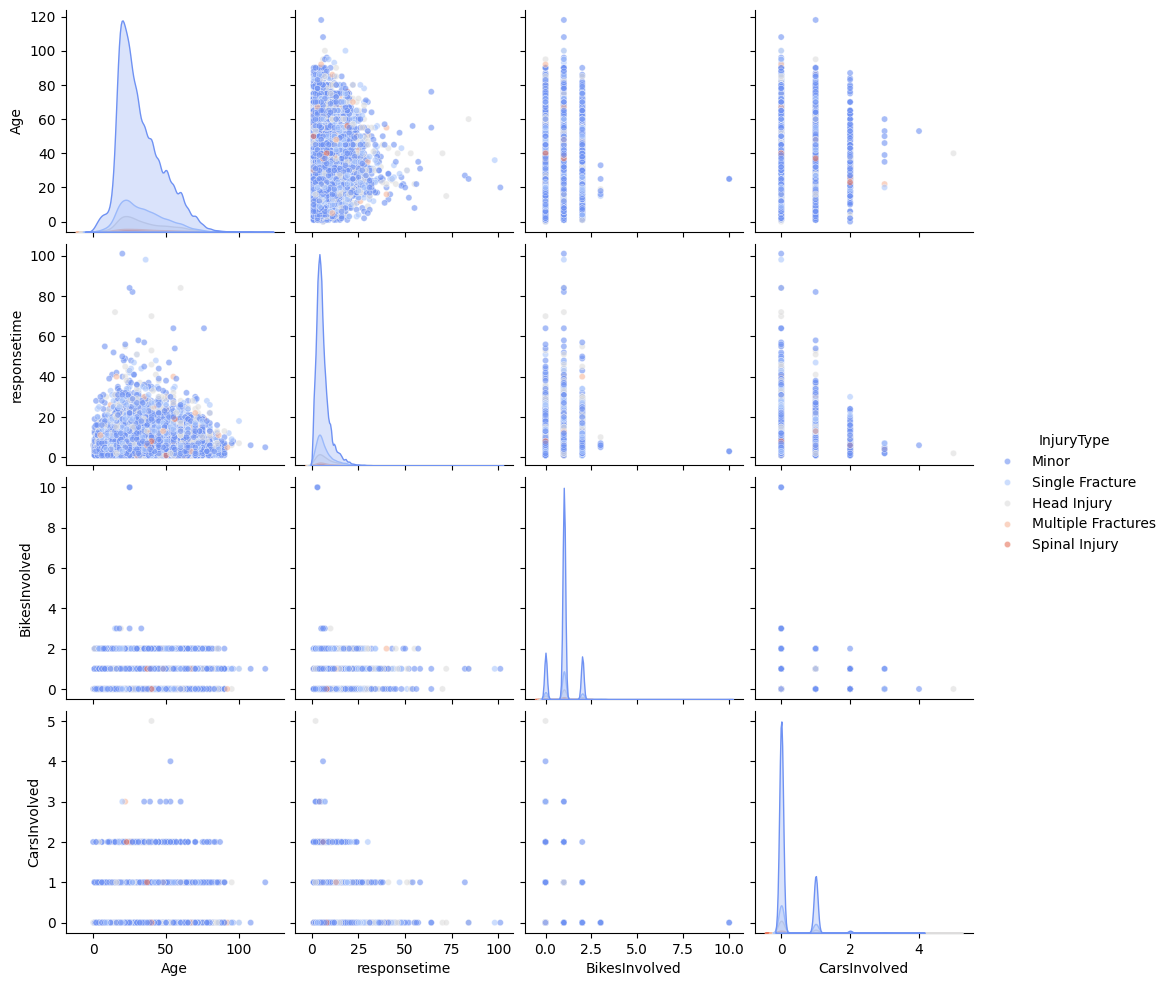

In [71]:
# Filter only numeric columns and ensure no non-numeric data
numerical_vars = ['Age', 'responsetime', 'BikesInvolved', 'CarsInvolved']
df_numeric = df_cleaned[numerical_vars].apply(pd.to_numeric, errors='coerce').dropna()

# Check if InjuryType is categorical (it should be)
if 'InjuryType' in df_cleaned.columns:
    df_numeric['InjuryType'] = df_cleaned['InjuryType']

# Pair Plot for Numerical Variables
sns.pairplot(df_numeric, vars=numerical_vars, diag_kind='kde', hue='InjuryType', palette='coolwarm', plot_kws={'alpha': 0.6, 's': 20})
plt.show()

**3.2 Heatmap for Correlations**

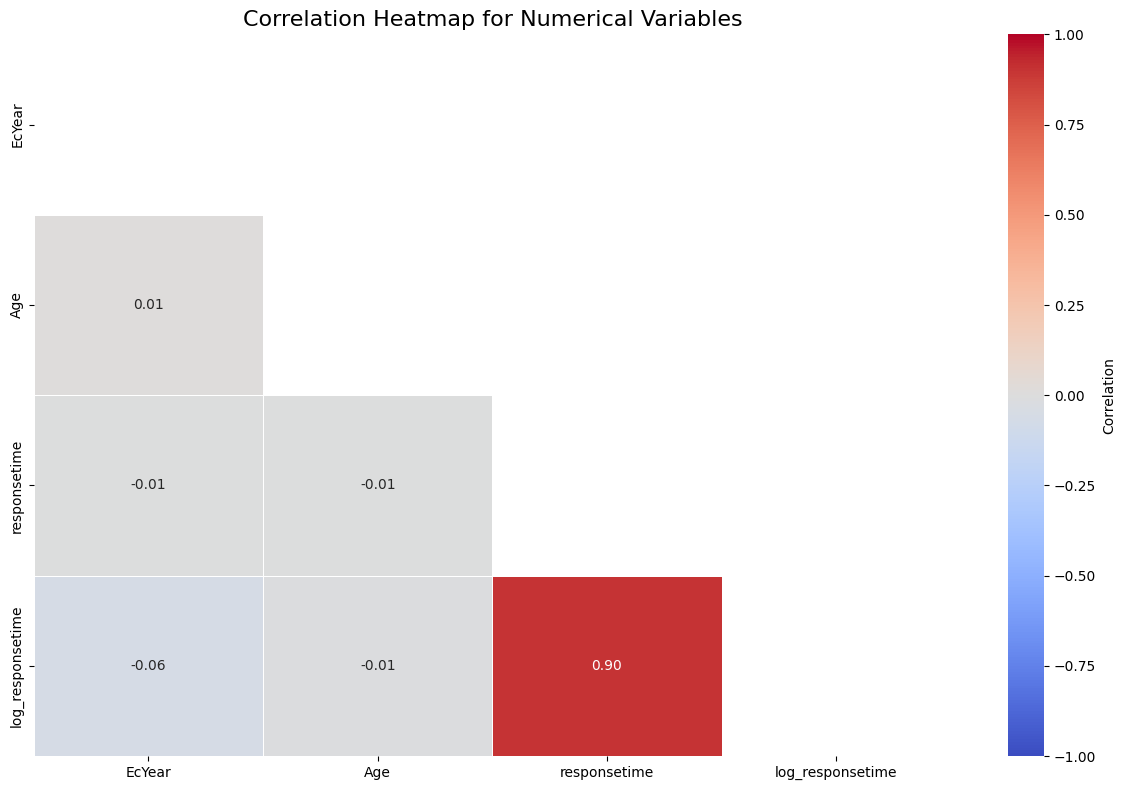

In [72]:
# Select only numerical columns for the correlation matrix
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).dropna()

# Generate a mask for the upper triangle (to hide duplicate values)
mask = np.triu(np.ones_like(numerical_cols.corr(), dtype=bool))

# Create a figure and heatmap
plt.figure(figsize=(12, 8))

# Correlation matrix heatmap with masking, better annotation format, and color range
sns.heatmap(numerical_cols.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"label": "Correlation"})

# Add title and display the plot
plt.title('Correlation Heatmap for Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

**Deeper Insights into Injury Type and Patient Status**

**Relationship Between Injury Type and Other Variables**

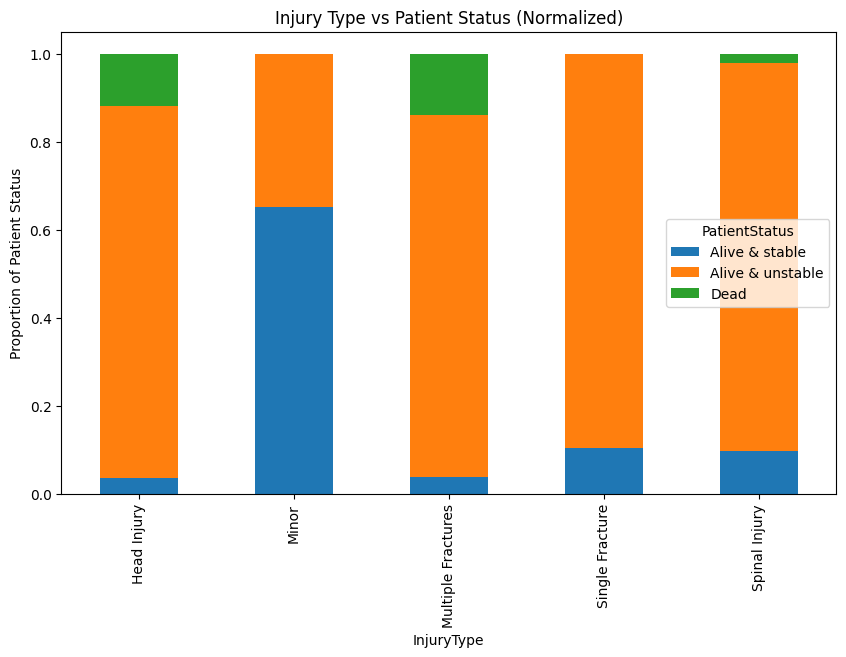

In [73]:
# Crosstab between Injury Type and Patient Status with proportions
injury_status_ct = pd.crosstab(df_cleaned['InjuryType'], df_cleaned['PatientStatus'], normalize='index')
injury_status_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Injury Type vs Patient Status (Normalized)')
plt.ylabel('Proportion of Patient Status')
plt.show()

**Injury Type vs Other Categorical Variables**

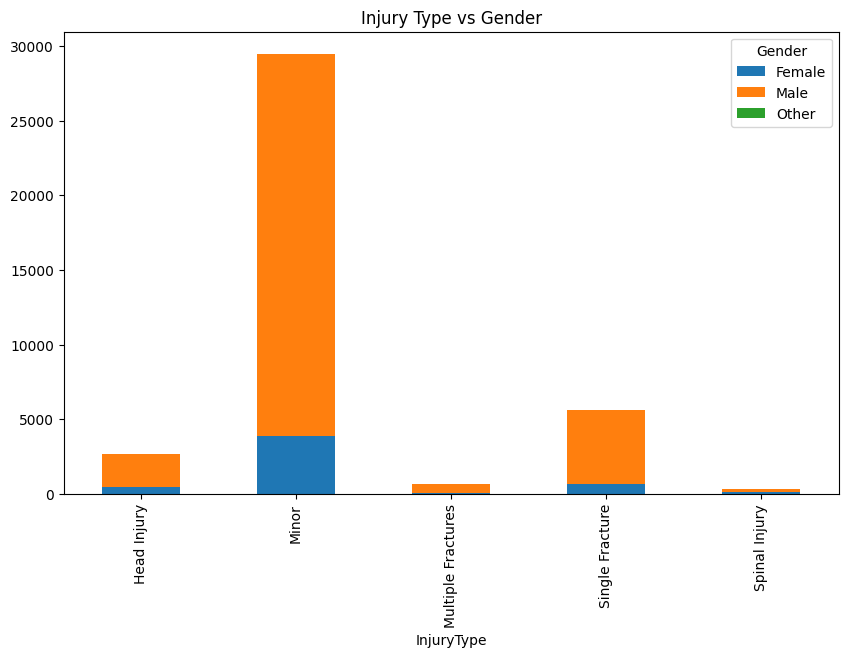

In [74]:
# Crosstab between Injury Type and Gender
injury_gender_ct = pd.crosstab(df_cleaned['InjuryType'], df_cleaned['Gender'])
injury_gender_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Injury Type vs Gender')
plt.show()

**Temporal Analysis Based on Injury Type**

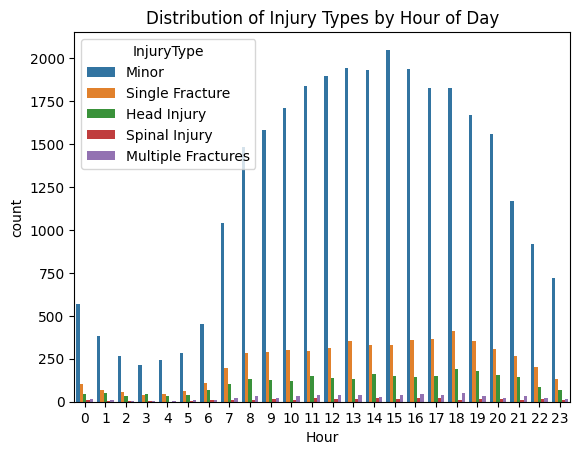

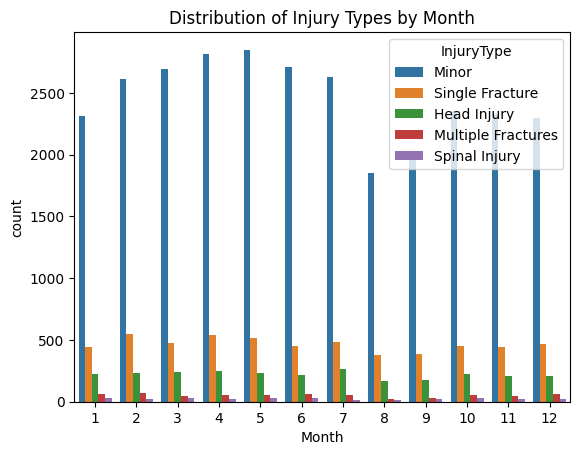

In [75]:
# Incidents by Hour of Day and Injury Type
sns.countplot(x='Hour', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Hour of Day')
plt.show()

# Incidents by Month and Injury Type
sns.countplot(x='Month', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Month')
plt.show()

**Pairing Categorical and Numerical Variables**

**Numerical Summary Based on Injury Type**

In [76]:
# Summary statistics for Age and Response Time by Injury Type
summary_stats = df_cleaned.groupby('InjuryType')[['Age', 'responsetime']].describe()
print(summary_stats)

                        Age                                                  \
                      count       mean        std   min    25%   50%    75%   
InjuryType                                                                    
Head Injury          2640.0  34.350758  16.201942   0.0  22.00  30.0  45.00   
Minor               29491.0  32.269608  15.029544   0.0  21.00  28.0  41.00   
Multiple Fractures    622.0  35.924437  16.953638   2.0  22.00  33.0  48.00   
Single Fracture      5586.0  34.003043  15.247683   1.0  22.00  31.0  45.00   
Spinal Injury         296.0  34.172297  13.584414  13.0  23.75  32.0  43.25   

                          responsetime                                     \
                      max        count      mean       std  min  25%  50%   
InjuryType                                                                  
Head Injury         100.0       2640.0  7.807197  6.471697  1.0  4.0  6.0   
Minor               118.0      29491.0  5.737616  4.206665 

**Boxplots for Multivariate Relationships**

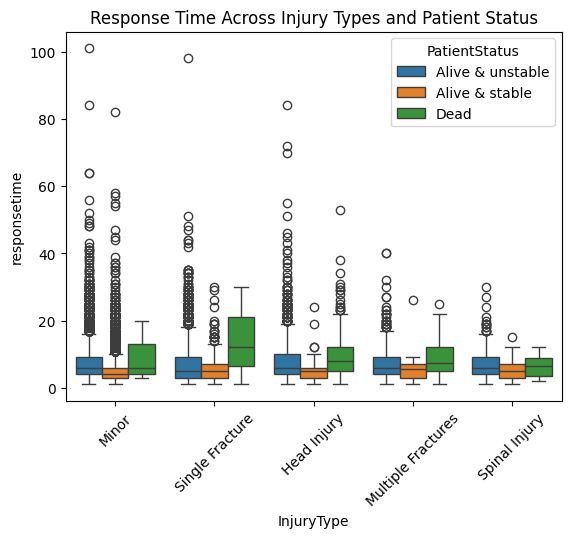

In [77]:
# Boxplot for Response Time across Injury Type, with Hue as Patient Status
sns.boxplot(x='InjuryType', y='responsetime', hue='PatientStatus', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Response Time Across Injury Types and Patient Status')
plt.show()

**Exploring Correlations with Focus on Patient Outcomes**

**Encoding Categorical Variables**

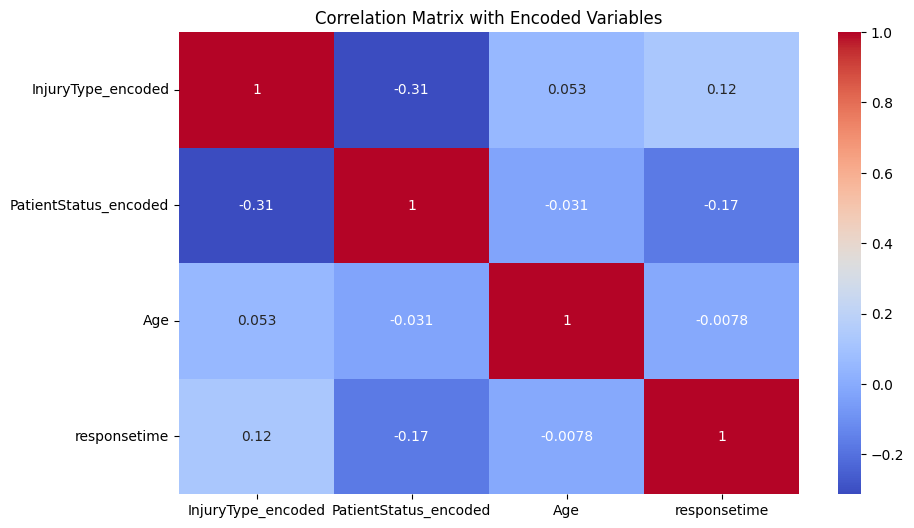

In [78]:
# Encode Injury Type and Patient Status
df_encoded = df_cleaned.copy()
df_encoded['InjuryType_encoded'] = df_encoded['InjuryType'].factorize()[0]
df_encoded['PatientStatus_encoded'] = df_encoded['PatientStatus'].factorize()[0]

# Correlation matrix with encoded Injury Type and Patient Status
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded[['InjuryType_encoded', 'PatientStatus_encoded', 'Age', 'responsetime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Variables')
plt.show()

**Explore Additional Categorical Variables' Impact on Patient Status and Injury Type**

**Crosstab Analysis for Other Categorical Variables**

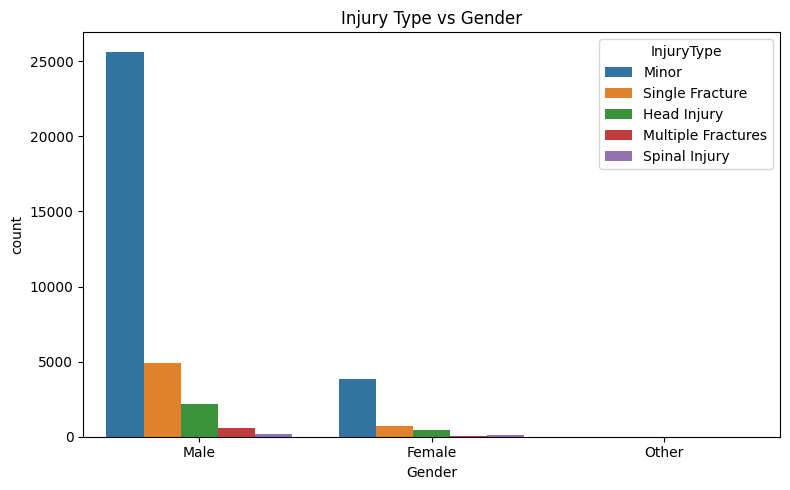

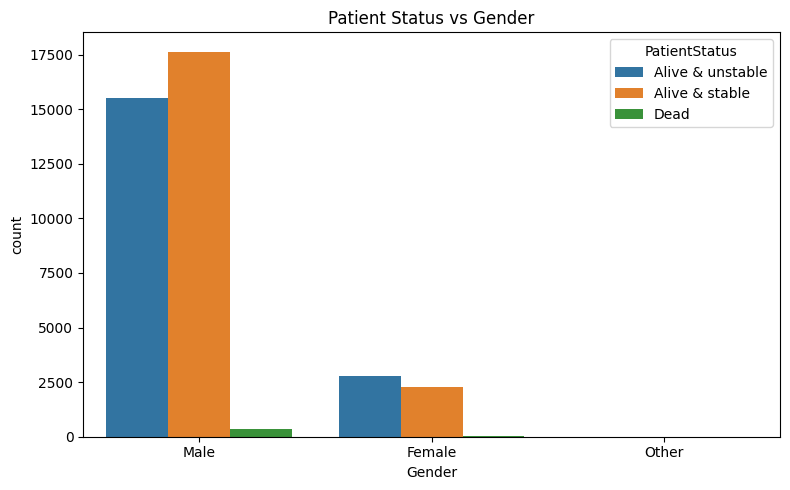

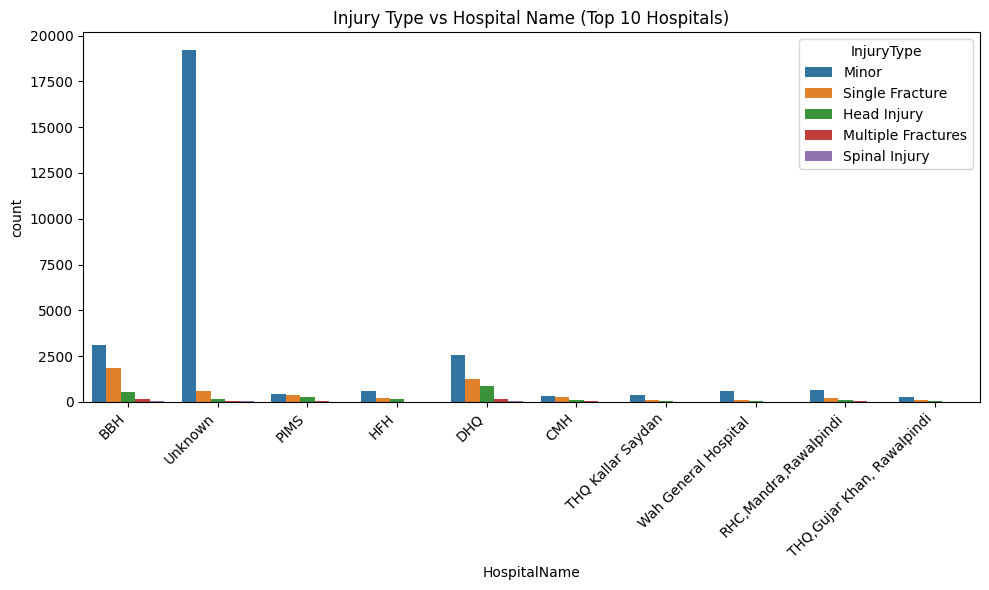

In [79]:
# Crosstab between InjuryType and Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='InjuryType', data=df_cleaned)
plt.title('Injury Type vs Gender')
plt.tight_layout()
plt.show()

# Crosstab between Patient Status and Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='PatientStatus', data=df_cleaned)
plt.title('Patient Status vs Gender')
plt.tight_layout()
plt.show()

# Crosstab between InjuryType and Hospital (Top 10 Hospitals by frequency)
top_hospitals = df_cleaned['HospitalName'].value_counts().nlargest(10).index
df_filtered = df_cleaned[df_cleaned['HospitalName'].isin(top_hospitals)]

plt.figure(figsize=(10, 6))
sns.countplot(x='HospitalName', hue='InjuryType', data=df_filtered)
plt.title('Injury Type vs Hospital Name (Top 10 Hospitals)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Advanced Correlation Analysis Between Features**

**Feature Importance or Correlation Heatmap with Encoded Variables**

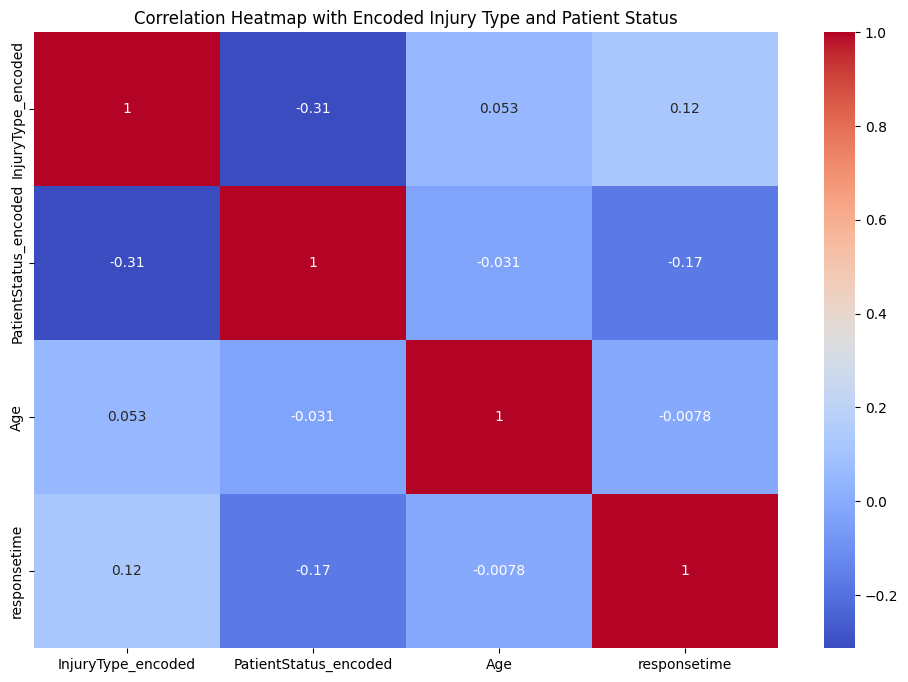

In [80]:
# Encoding categorical columns to numerical for better correlation analysis
df_encoded['InjuryType_encoded'] = df_encoded['InjuryType'].factorize()[0]
df_encoded['PatientStatus_encoded'] = df_encoded['PatientStatus'].factorize()[0]

# Correlation matrix with encoded variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded[['InjuryType_encoded', 'PatientStatus_encoded', 'Age', 'responsetime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Encoded Injury Type and Patient Status')
plt.show()

**Temporal Analysis: Seasonal and Hourly Trends**

**Temporal Trends in Injury Type**

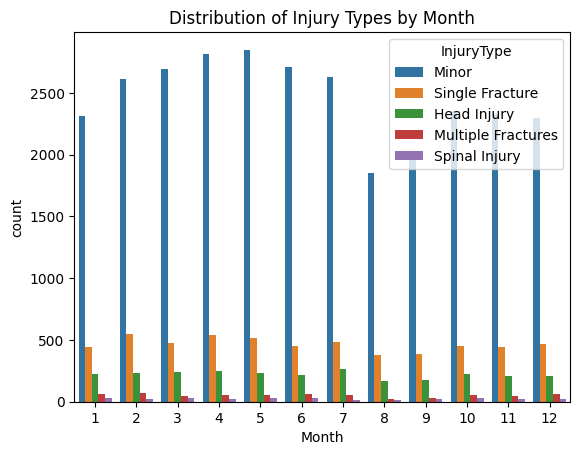

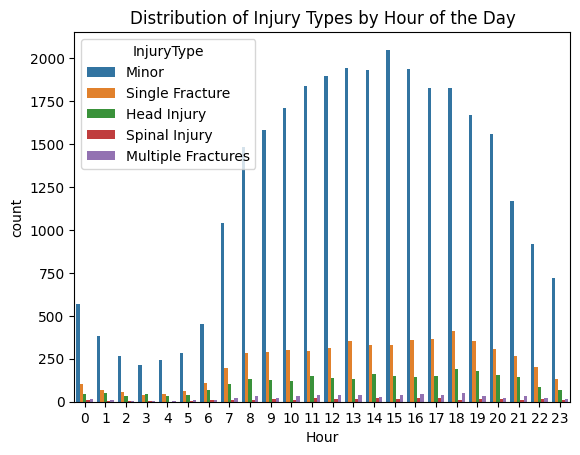

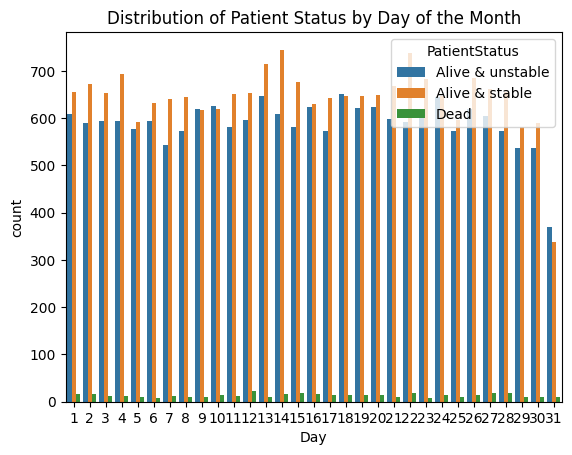

In [81]:
# Incidents by Month and Injury Type
sns.countplot(x='Month', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Month')
plt.show()

# Incidents by Hour and Injury Type
sns.countplot(x='Hour', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Hour of the Day')
plt.show()

# Incidents by Day and Patient Status
sns.countplot(x='Day', hue='PatientStatus', data=df_cleaned)
plt.title('Distribution of Patient Status by Day of the Month')
plt.show()

**Vehicle Involvement and Its Impact on Injury and Patient Status**

**Explore the Influence of Different Vehicle Involvements**

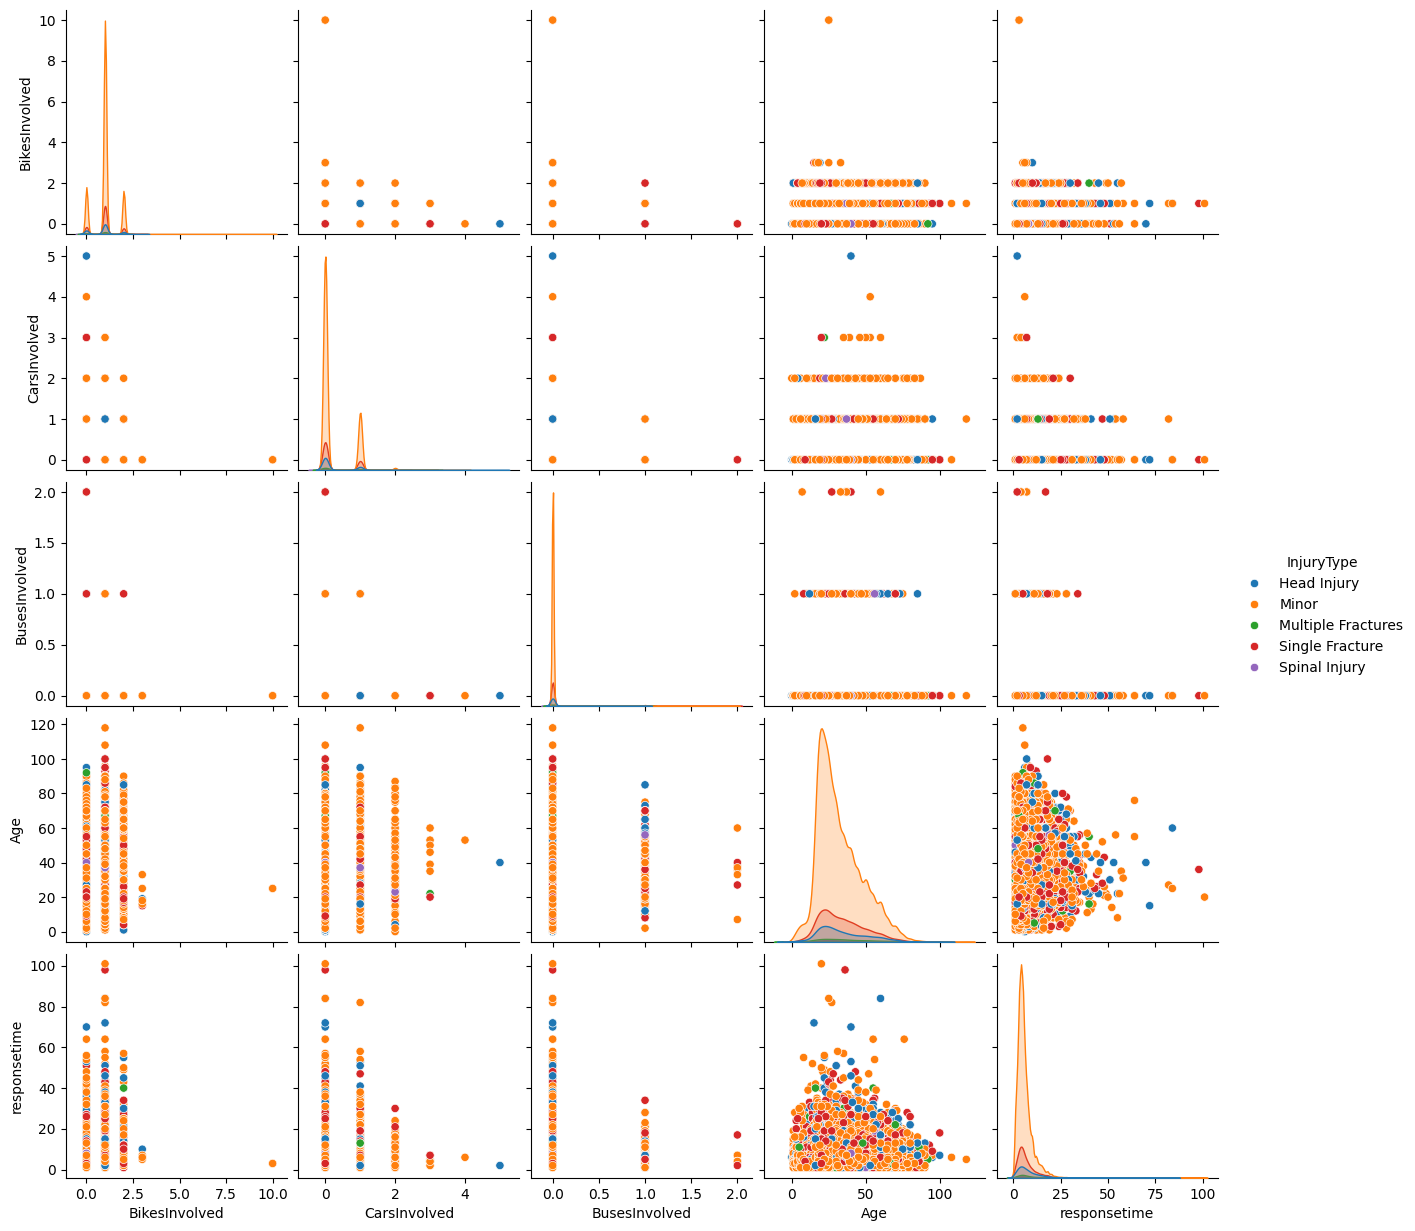

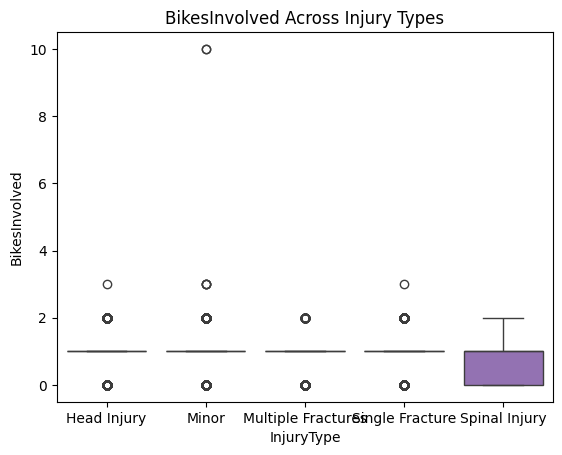

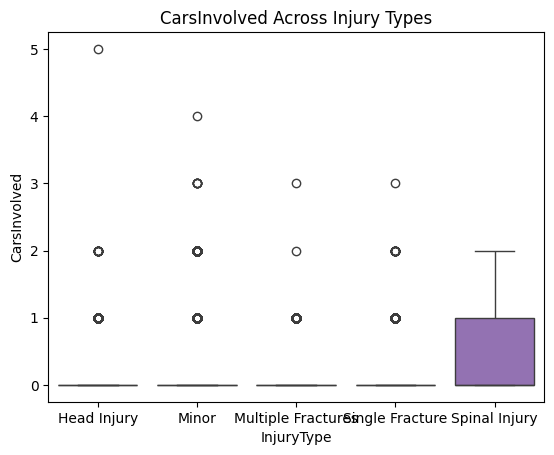

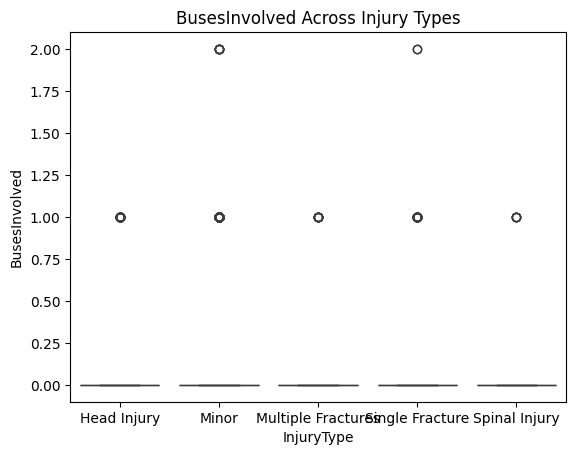

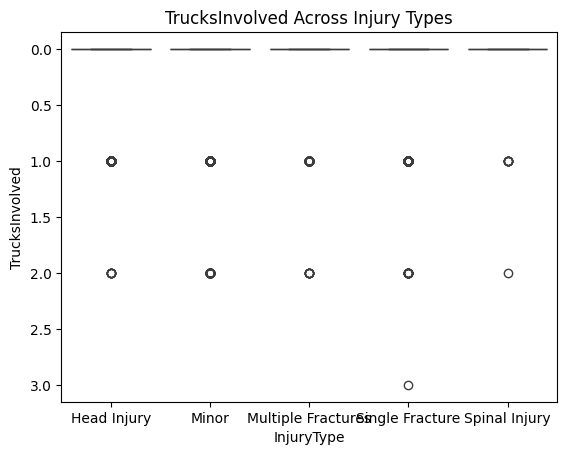

In [82]:
# Ensure necessary columns are numeric
numeric_cols = ['BikesInvolved', 'CarsInvolved', 'BusesInvolved', 'Age', 'responsetime']
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert 'InjuryType' to categorical
df_cleaned['InjuryType'] = df_cleaned['InjuryType'].astype('category')

# Drop rows with missing values in the relevant columns
df_cleaned.dropna(subset=numeric_cols, inplace=True)

# Generate the pair plot
sns.pairplot(
    df_cleaned,
    vars=numeric_cols,
    hue='InjuryType',
    diag_kind='kde'
)
plt.show()

# Generate boxplots for vehicle involvement across injury types
vehicle_involvement_cols = ['BikesInvolved', 'CarsInvolved', 'BusesInvolved', 'TrucksInvolved']

for col in vehicle_involvement_cols:
    if col in df_cleaned.columns:
        sns.boxplot(
            x='InjuryType',
            y=col,
            data=df_cleaned,
            hue='InjuryType',
            dodge=False
        )
        plt.title(f'{col} Across Injury Types')
        plt.legend([],[], frameon=False)
        plt.show()